<a href="https://colab.research.google.com/github/chikakoto/facial-expression-recognition/blob/main/notebooks/RH_SGD_RF_v4_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Source 
https://www.kaggle.com/datasets/msambare/fer2013
https://drive.google.com/file/d/168XK2dmyPg9d6AI3cgbxhCXdIow7uVK-/view?usp=sharing 


Regularized linear models with Stochastic Gradient Descent (SGD)

# Importing Library & Downloading Raw data

In [35]:
# Importing basic python Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
%matplotlib inline
from skimage.transform import resize
from skimage.io import imread
from glob import glob
from scipy import ndimage as ndi
from skimage import feature


#Model
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

#Metrics
from sklearn.model_selection import train_test_split, learning_curve, validation_curve, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc

#GridSearch & Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler


import math
from tensorflow.keras.utils import to_categorical

from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter
import random

In [135]:
from skimage import feature
import pickle
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [37]:
#mounting google drive and navigating to project folder
from google.colab import drive
drive.mount('/content/drive')
# %cd drive/MyDrive/Colab Notebooks/facial-expression-recognition

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data

In [12]:
#navigating to project folder in Google Drive 
%cd /content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/Version_2.0

/content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/Version_2.0


In [ ]:
emotion_labels = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}

In [ ]:
emotion_labels = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}
X_train, X_test, y_train, y_test = custom_train_test_split('data/hog_scaled2.csv', 3)

data/hog_scaled2.csv
Shape of data > : (X_train, X_test, y_train, y_test) (31432, 2304) (7896, 2304) (31432,) (7896,)


In [ ]:
print(type(X_train), type(X_test), type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
len(X_train[0])

2304

In [ ]:
y_train[0]

2

In [ ]:
#Orginal Data 
model = SGDClassifier(random_state=42, max_iter=5000, tol=1e-3, n_jobs = -1,shuffle=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#model_score=accuracy_score(y_test, y_pred)
#cm = confusion_matrix(y_test, y_pred)
print(model.score(X_test, y_test))

0.37360688956433635


In [ ]:
#Orginal Data 
model = SGDClassifier(random_state=42, max_iter=5000, tol=1e-3, n_jobs = 8,shuffle=True
                      ,class_weight= 'balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#model_score=accuracy_score(y_test, y_pred)
#cm = confusion_matrix(y_test, y_pred)
print(model.score(X_test, y_test))

0.3696808510638298


#GridSearchCV

## SGDClassifier - GridSearchCV

In [ ]:
model = SGDClassifier(random_state=42)
loss = ['hinge','log', 'modified_huber','squared_hinge']
penalty = ['l1', 'l2', 'elasticnet']
alpha = [0.0001, 0.001, 0.01, 0.1, 1]
learning_rate = ['optimal']

param_distributions = dict(loss=loss,
                           penalty=penalty,
                           alpha=alpha,
                           learning_rate=learning_rate)

grid = GridSearchCV(estimator=model, 
param_grid=param_distributions, 
scoring='roc_auc', 
verbose=1, 
n_jobs=-1) 

In [ ]:
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  category=UserWarning,


Best Score:  nan
Best Params:  {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l1'}


this took 1 hour and 56 minutes for Fitting 5 folds for each of 60 candidates, totalling 300 fits

Fitting 5 folds for each of 60 candidates, totalling 300 fits
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  category=UserWarning,
Best Score:  nan
- Best Params:  
- {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l1'}

## RandomForest Grid Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
grid_cv = {'n_estimators': [100, 200, 400, 800, 1600, 2000],
     'max_features': ['auto', 'sqrt'],
     'max_depth': [10, 20, 40, 60, 80]}
     #'min_samples_split': [2, 5, 10,50,100],
     #'min_samples_leaf': [1, 2, 4,10]}

In [ ]:
g = {'n_estimators': [100, 200, 400, 800, 1600, 2000],
     'max_features': ['auto', 'sqrt'],
     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
     'min_samples_split': [2, 5, 10,50,100],
     'min_samples_leaf': [1, 2, 4]}

In [ ]:
rf_grid_cv = GridSearchCV(estimator = rf, param_grid = grid_cv,
                          cv = 5, verbose=2,n_jobs = 8,scoring= 'accuracy')

In [ ]:
%time rf_grid_cv.fit(X_train, y_train)
print(rf_grid_cv.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CPU times: user 5min 12s, sys: 14.8 s, total: 5min 27s
Wall time: 5h 50min 27s
{'max_depth': 60, 'max_features': 'sqrt', 'n_estimators': 800}


Fitting 5 folds for each of 60 candidates, totalling 300 fits
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
- CPU times: user 5min 12s, sys: 14.8 s, 
- total: 5min 27s
- Wall time: 5h 50min 27s

- {'max_depth': 60, 'max_features': 'sqrt', 'n_estimators': 800}

 Because of memory issue we have splited grid search into two part 
 - part one: n_estimators and 
 - max_features
 - max_features

In [ ]:
grid_cv = {'n_estimators': [800,2000], 
           'max_features': [ 'sqrt'],
           'max_depth': [60],
           'min_samples_split': [2, 5, 10,50,100],
           'min_samples_leaf': [1, 2, 4,10]}

In [ ]:
rf_grid_cv = GridSearchCV(estimator = rf, param_grid = grid_cv,
                          cv = 5, verbose=2,n_jobs = -1,scoring= 'accuracy')

In [ ]:
#ReExecuting grid search to pick best min sample split and min sample leafe 
#aganist current best of n_estimators, max_features and max_depth
%time rf_grid_cv.fit(X_train, y_train)
print(rf_grid_cv.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CPU times: user 13min 27s, sys: 30.7 s, total: 13min 58s
Wall time: 5h 59min 19s
{'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2000}


Fitting 5 folds for each of 40 candidates, totalling 200 fits
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
CPU times: user 13min 27s, sys: 30.7 s, total: 13min 58s
Wall time: 5h 59min 19s

{'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2000}

### Test RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#{'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2000}
from sklearn.ensemble import RandomForestClassifier
#X_train, X_test, y_train, y_test
rf_org = RandomForestClassifier(n_estimators=2000,max_features='sqrt',random_state=101, n_jobs=-1,max_depth=60, min_samples_leaf=1, min_samples_split=2)
rf_org.fit(X_train,y_train)

result = rf_org.score(X_test, y_test)
print(result)

0.5481256332320162


In [ ]:
print(rf_org.max_depth)

None


Fitting 3 folds for each of 100 candidates, totalling 300 fits
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning

In [ ]:
csv_list = ['data/hog_data2.csv', 'data/hog_scaled2.csv']
hog_predictions = []
hog_actuals = []
for i in range(len(csv_list)):
    pred, act = processSVM(csv_list[i], 3)
    hog_predictions.append(pred)
    hog_actuals.append(act)

data/hog_data2.csv
(31432, 2304)
(31432,)
(7896, 2304)
(7896,)
Train Accuracy: 0.999
Test Accuracy: 0.405
data/hog_scaled2.csv
(31432, 2304)
(31432,)
(7896, 2304)
(7896,)


In [ ]:
#emotion_labels = {0:‘angry’, 2:‘fear’, 3:‘happy’, 4:‘sad’, 5:‘surprise’, 6:‘neutral’}
#Please ignore this step if you downloaded the zip file from above step 
#Downloading raw image zip file from google drive
from zipfile import ZipFile
!gdown --id 168XK2dmyPg9d6AI3cgbxhCXdIow7uVK- -O archive.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=168XK2dmyPg9d6AI3cgbxhCXdIow7uVK-
To: /content/archive.zip
100% 63.3M/63.3M [00:01<00:00, 50.0MB/s]


In [ ]:
#Unzippliing the zip file 
with ZipFile('/content/archive.zip', 'r') as f:
  f.extractall()

In [ ]:
# Data files directory
train_dir = '/content/train'
test_dir = '/content/test'
emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}
emotions_labelss = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'sad', 5: 'surprise', 6: 'neutral'}

In [ ]:
#X_train, X_test, y_train, y_test
X_train_org, y_train_org, lb = import_data_return2set(train_dir, emotions)
X_test_org, y_test_org, lb = import_data_return2set(test_dir, emotions)
#print(X_train_org.shape, X_test_org.shape, y_train_org.shape, y_test_org.shape)
print(len(X_train_org), len(X_test_org), len(y_train_org), len(y_test_org))

28709 7178 28709 7178


## Test 1

In [ ]:
#Converting data to numpy array and reshaping it
X_train = np.array(X_train_org).reshape(28709,48*48 )
y_train = np.array(y_train_org)
X_test = np.array(X_test_org).reshape(7178,48*48 )
y_test = np.array(y_test_org)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        SGDClassifier(random_state=42, max_iter=5000, tol=1e-3))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.185


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [3595  392 3688 6493 4347 2854 4469], Acc: 0.151
Fold:  2, Class dist.: [3595  393 3687 6493 4347 2854 4469], Acc: 0.205
Fold:  3, Class dist.: [3595  393 3687 6493 4347 2854 4469], Acc: 0.188
Fold:  4, Class dist.: [3595  393 3687 6494 4347 2854 4468], Acc: 0.206
Fold:  5, Class dist.: [3595  393 3687 6494 4347 2854 4468], Acc: 0.234
Fold:  6, Class dist.: [3596  392 3687 6494 4347 2854 4468], Acc: 0.216
Fold:  7, Class dist.: [3596  392 3687 6494 4347 2854 4468], Acc: 0.163
Fold:  8, Class dist.: [3596  392 3687 6494 4347 2854 4468], Acc: 0.187
Fold:  9, Class dist.: [3596  392 3688 6493 4347 2853 4469], Acc: 0.213
Fold: 10, Class dist.: [3596  392 3688 6493 4347 2854 4469], Acc: 0.168

CV accuracy: 0.193 +/- 0.025


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.19470568 0.23267154 0.22849181 0.20585162 0.18913271 0.17485197
 0.20794148 0.19923372 0.2246604  0.19616725]
CV accuracy: 0.205 +/- 0.018


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        SGDClassifier(loss='log', penalty='l2',alpha=0.1,max_iter=5000, tol=1e-3, random_state=42))

train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_lr, X=X_train,
                                                       y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

### Addressing over- and underfitting with validation curves

In [ ]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='SGDClassifier', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

In [ ]:
clf = gs.best_estimator_

# clf.fit(X_train, y_train) 
# note that we do not need to refit the classifier
# because this is done automatically via refit=True.

print('Test accuracy: %.3f' % clf.score(X_test, y_test))

In [ ]:
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), 
                                      np.std(scores)))

#### Test 2

In [ ]:
unique, counts = np.unique(y_train_org, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 3995]
 [   1  436]
 [   2 4097]
 [   3 7215]
 [   4 4830]
 [   5 3171]
 [   6 4965]]


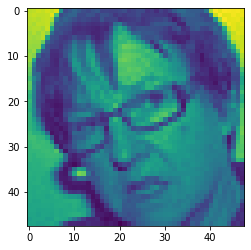

In [ ]:
plt.imshow(X_train_org[1])

In [ ]:
X_train_hog = np.array([feature.hog(image) for image in X_train_org])
X_train_hog.shape

(28709, 1296)

In [ ]:
# split the dataframe in to train, test and validation data frames
X_train, X_val, y_train, y_val = train_test_split(X_train_hog, np.array(y_train_org), test_size = 0.01, shuffle = True)
X_train.shape, y_train.shape

((28421, 1296), (28421,))

In [ ]:
X_Test_hog = np.array([feature.hog(image) for image in X_test_org])
X_Test_hog.shape

(7178, 1296)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Final Model

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

In [ ]:
data_list = [('data/fer_lda_std.csv',4), ('data/fer_pca_std.csv',1),('data/hog_scaled2.csv',3)]
model_dir = ['fer_lda_std', 'fer_pca_std', 'hog_scaled2']

## MOdel Training

In [ ]:
d#ir = 'FinalModel'
#navigating to SGD dir
#%cd drive/MyDrive/Colab Notebooks/facial-expression-recognition/SGD
#filename = 'rf_org_hog.sav'
#emotion_labels = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}
X_train, X_test, y_train, y_test = custom_train_test_split('../data/hog_scaled2.csv', 3)

Best Params: SDG
{'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l1'}

RF
{'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2000}

In [ ]:
for data in data_list:
  data_dir, file_type = data
  X_train, X_test, y_train, y_test = custom_train_test_split(data_dir, file_type)
  rf_model(X_train,y_train, data_dir[5:-4])
  sdg_model(X_train,y_train, data_dir[5:-4])

data/fer_lda_std.csv
Shape of data > : (X_train, X_test, y_train, y_test) (31432, 6) (7896, 6) (31432,) (7896,)
RandomForestClassifier
<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
data/fer_pca_std.csv
Shape of data > : (X_train, X_test, y_train, y_test) (31432, 112) (7896, 112) (31432,) (7896,)
RandomForestClassifier
<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
data/hog_scaled2.csv
Shape of data > : (X_train, X_test, y_train, y_test) (31432, 2304) (7896, 2304) (31432,) (7896,)
RandomForestClassifier
<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>


## Data: fer_lda_std

In [108]:
#navigating to model dir
%cd /content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/Version_2.0/FinalModel

/content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/Version_2.0/FinalModel


In [109]:
emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}

In [110]:
#Loading data for model analysis 
#
X_train, X_test, y_train, y_test = custom_train_test_split('../data/fer_lda_std.csv', 4)
rf_model_dump = 'rf_fer_lda_std'
sdg_model_dump = 'sdg_fer_lda_std'

../data/fer_lda_std.csv
Shape of data > : (X_train, X_test, y_train, y_test) (31432, 6) (7896, 6) (31432,) (7896,)


### SGD Classifier

0.3102836879432624


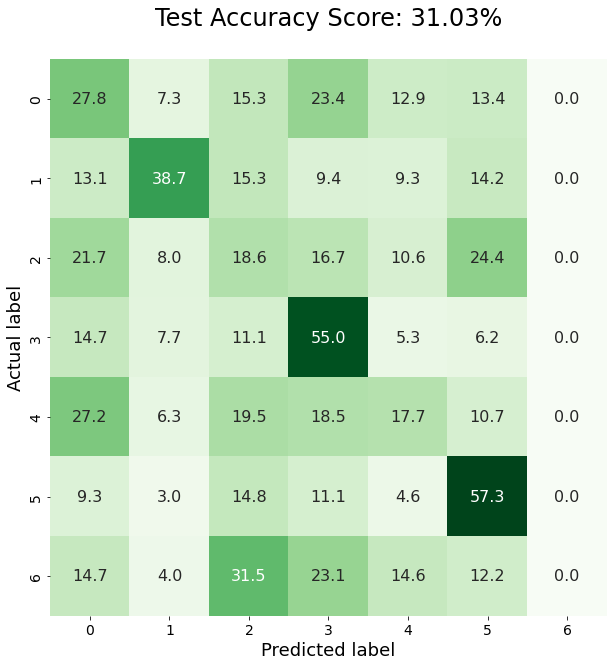

In [113]:
#Load the model and test for accuracy 
loaded_model = pickle.load(open(sdg_model_dump, 'rb'))
score = loaded_model.score(X_test, y_test)
print(score)
y_pred = loaded_model.predict(X_test)
plot_cm(confusion_matrix(y_test, y_pred),score)

In [ ]:
#need f1 score and other stuff 

### Random Forest Classifier

0.47429078014184395


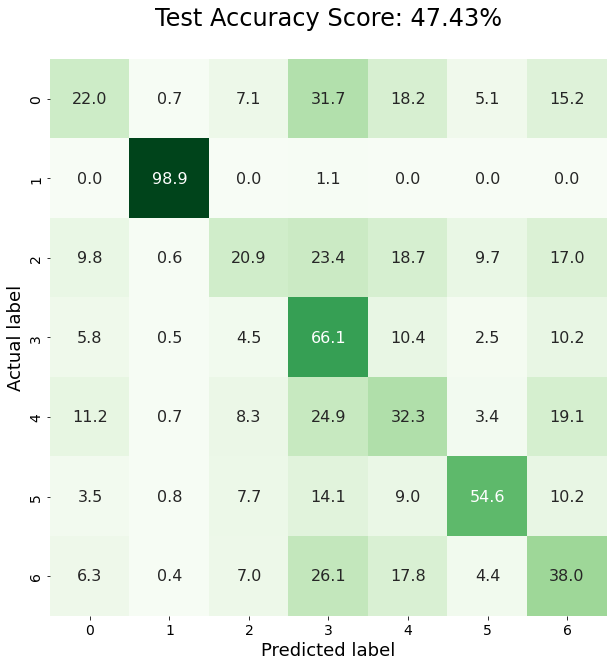

In [ ]:
#Load the model and test for accuracy 
loaded_model = pickle.load(open(rf_model_dump, 'rb'))
score = loaded_model.score(X_test, y_test)
print(score)
y_pred = loaded_model.predict(X_test)
plot_cm(confusion_matrix(y_test, y_pred),score)

emotion_labels = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}

##Data : fer_pca_std

In [ ]:
#Loading data for model analysis 
#data_list = [('data/fer_lda_std.csv',4), ('data/fer_pca_std.csv',1),('data/hog_scaled2.csv',3)]
X_train, X_test, y_train, y_test = custom_train_test_split('../data/fer_pca_std.csv', 1)
rf_model_dump = 'rf_fer_pca_std'
sdg_model_dump = 'sdg_fer_pca_std'

../data/fer_pca_std.csv
Shape of data > : (X_train, X_test, y_train, y_test) (31432, 112) (7896, 112) (31432,) (7896,)


### SGD Classifier

0.3140830800405269


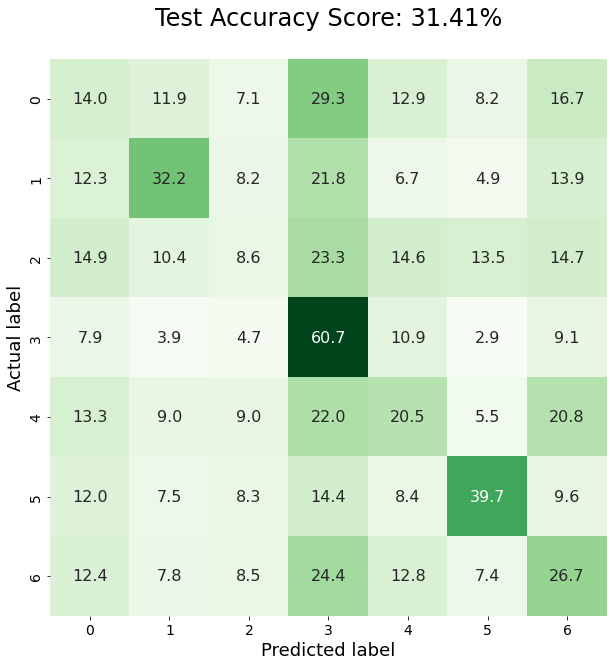

In [ ]:
#Load the model and test for accuracy 
loaded_model = pickle.load(open(sdg_model_dump, 'rb'))
score = loaded_model.score(X_test, y_test)
print(score)
y_pred = loaded_model.predict(X_test)
plot_cm(confusion_matrix(y_test, y_pred),score)

### Random Forest Classifier

0.5115248226950354


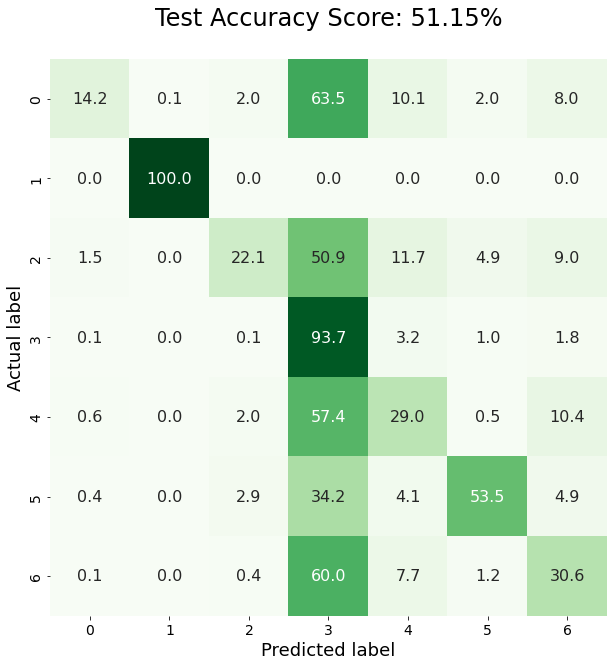

In [ ]:
#Load the model and test for accuracy 
loaded_model = pickle.load(open(rf_model_dump, 'rb'))
score = loaded_model.score(X_test, y_test)
print(score)
y_pred = loaded_model.predict(X_test)
plot_cm(confusion_matrix(y_test, y_pred),score)

##Data : hog_scaled2

In [14]:
cd FinalModel

/content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/Version_2.0/FinalModel


In [114]:
#Loading data for model analysis 
#data_list = [('data/fer_lda_std.csv',4), ('data/fer_pca_std.csv',1),('data/hog_scaled2.csv',3)]
X_train, X_test, y_train, y_test = custom_train_test_split('../data/hog_scaled2.csv', 3)
rf_model_dump = 'rf_hog_scaled2'
sdg_model_dump = 'sdg_hog_scaled2'

../data/hog_scaled2.csv
Shape of data > : (X_train, X_test, y_train, y_test) (31432, 2304) (7896, 2304) (31432,) (7896,)


### SGD Classifier

0.3618287740628166


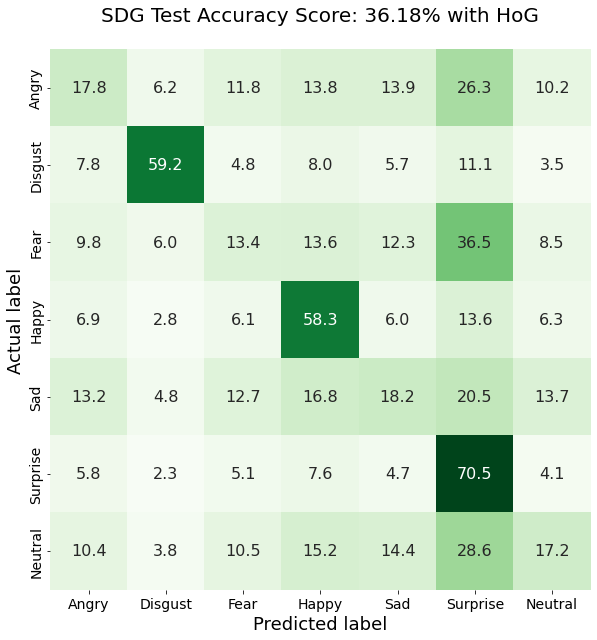

In [ ]:
#Load the model and test for accuracy 
loaded_model = pickle.load(open(sdg_model_dump, 'rb'))
score = loaded_model.score(X_test, y_test)
print(score)
y_pred = loaded_model.predict(X_test)
plot_cm(confusion_matrix(y_test, y_pred),score, 'SDG', 'HoG')

In [129]:
loaded_model = pickle.load(open(sdg_model_dump, 'rb'))
y_pred = loaded_model.predict(X_test)
cm=Confusion_matrix(y_test, y_pred, target_names=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])

Confusion Matrix of given model is :
Count=7896           Angry      Disgust    Fear       Happy      Sad        Surprise   Neutral   
Actual Angry          170        59         113        132        133        252        98        
Actual Disgust        65         491        40         66         47         92         29        
Actual Fear           100        61         137        139        126        374        87        
Actual Happy          122        50         108        1034       107        241        112       
Actual Sad            165        60         158        210        227        256        171       
Actual Surprise       48         19         42         63         39         586        34        
Actual Neutral        128        47         129        187        177        353        212       


In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.21      0.18      0.19       957
           1       0.62      0.59      0.61       830
           2       0.19      0.13      0.16      1024
           3       0.56      0.58      0.57      1774
           4       0.27      0.18      0.22      1247
           5       0.27      0.71      0.39       831
           6       0.29      0.17      0.21      1233

    accuracy                           0.36      7896
   macro avg       0.34      0.36      0.34      7896
weighted avg       0.36      0.36      0.35      7896



In [133]:
performance_report(cm, 'SGD', 'HoG\n')

       Classification Report for SGD with HoG

       labels Precision    Recall  F1-Score   Support

        Angry      0.21      0.18      0.19       957
      Disgust      0.62      0.59      0.61       830
         Fear      0.19      0.13      0.16      1024
        Happy      0.56      0.58      0.57      1774
          Sad      0.27      0.18      0.22      1247
     Surprise      0.27      0.71      0.39       831
      Neutral      0.29      0.17      0.21      1233

     Accuracy                          0.36      7896
    Macro_avg      0.34      0.36      0.34      7896
 Weighted_avg      0.36      0.36      0.35      7896


{'Accuracy': ['', '', 0.3618287740628166, 7896],
 'Angry': [0.21303258145363407, 0.17763845350052246, 0.19373219373219372, 957],
 'Disgust': [0.6238881829733164, 0.591566265060241, 0.6072974644403216, 830],
 'Fear': [0.18844566712517194, 0.1337890625, 0.15648201027984007, 1024],
 'Happy': [0.5647187329328236, 0.5828635851183765, 0.5736477115117892, 1774],
 'Macro_avg': [0.34466483156267463,
  0.3635724435712846,
  0.3363208811033835,
  7896],
 'Neutral': [0.2853297442799462,
  0.17193836171938362,
  0.2145748987854251,
  1233],
 'Sad': [0.2651869158878505, 0.18203688853247796, 0.21588207322872088, 1247],
 'Surprise': [0.2720519962859796,
  0.7051744885679904,
  0.39262981574539363,
  831],
 'Weighted_avg': [0.35778288188968566,
  0.3618287740628166,
  0.34541519706670626,
  7896]}

### Random Forest Classifier

0.5514184397163121


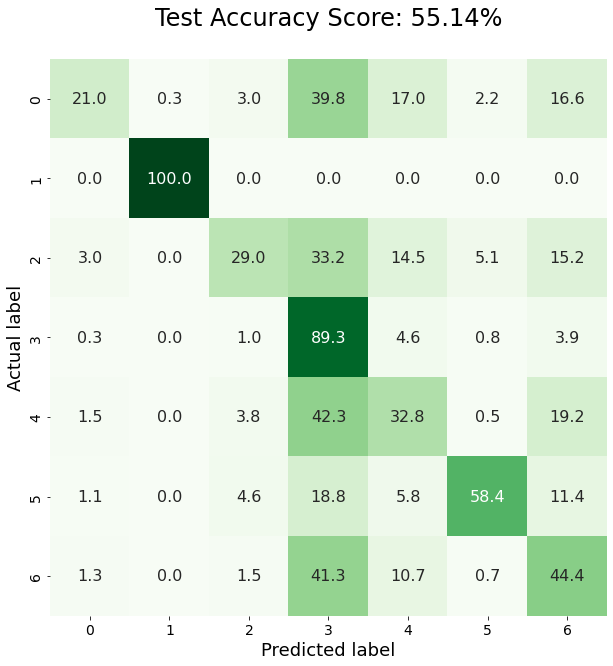

In [ ]:
#Load the model and test for accuracy 
loaded_model = pickle.load(open(rf_model_dump, 'rb'))
score = loaded_model.score(X_test, y_test)
print(score)
y_pred = loaded_model.predict(X_test)
plot_cm(confusion_matrix(y_test, y_pred),score)

In [125]:
loaded_model = pickle.load(open(rf_model_dump, 'rb'))
y_pred = loaded_model.predict(X_test)
cm=Confusion_matrix(y_test, y_pred, target_names=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])

Confusion Matrix of given model is :
Count=7896           Angry      Disgust    Fear       Happy      Sad        Surprise   Neutral   
Actual Angry          201        3          29         381        163        21         159       
Actual Disgust        0          830        0          0          0          0          0         
Actual Fear           31         0          297        340        148        52         156       
Actual Happy          6          0          18         1584       81         15         70        
Actual Sad            19         0          47         527        409        6          239       
Actual Surprise       9          0          38         156        48         485        95        
Actual Neutral        16         0          19         509        132        9          548       


In [128]:
performance_report(cm, 'Random forest', 'HoG\n')

       Classification Report for Random forest with HoG

       labels Precision    Recall  F1-Score   Support

        Angry      0.71      0.21      0.32       957
      Disgust      1.00      1.00      1.00       830
         Fear      0.66      0.29      0.40      1024
        Happy      0.45      0.89      0.60      1774
          Sad      0.42      0.33      0.37      1247
     Surprise      0.82      0.58      0.68       831
      Neutral      0.43      0.44      0.44      1233

     Accuracy                          0.55      7896
    Macro_avg      0.64      0.54      0.55      7896
 Weighted_avg      0.60      0.55      0.53      7896


{'Accuracy': ['', '', 0.5514184397163121, 7896],
 'Angry': [0.7127659574468085, 0.21003134796238246, 0.324455205811138, 957],
 'Disgust': [0.9963985594237695, 1.0, 0.9981960312687913, 830],
 'Fear': [0.6629464285714286, 0.2900390625, 0.4035326086956522, 1024],
 'Happy': [0.45295967972547896, 0.8928974069898534, 0.6010244735344338, 1774],
 'Macro_avg': [0.6427628320413589,
  0.5355762295421018,
  0.5451905324455192,
  7896],
 'Neutral': [0.4325177584846093,
  0.4444444444444444,
  0.43839999999999996,
  1233],
 'Sad': [0.4169215086646279, 0.3279871692060946, 0.367145421903052, 1247],
 'Surprise': [0.8248299319727891, 0.5836341756919374, 0.6835799859055673, 831],
 'Weighted_avg': [0.5990583372940943,
  0.5514184397163121,
  0.5299991963867049,
  7896]}

## Curves

In [134]:
sdg = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3,
                      alpha= 0.0001, learning_rate= 'optimal', 
                      loss='hinge', penalty= 'l1')

In [136]:
from sklearn.model_selection import KFold

In [ ]:
cv_scores = []
for k in k_list:
    knn = KNN(n_neighbors=k, weights='distance', metric='minkowski')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    # Append avg score to the list
    cv_scores.append(scores.mean())
    print('CV accuracy scores: %s' % scores)
    print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

## WIP matrix and graph 

In [ ]:
svm = SVC(C=10.0, random_state=1, kernel='rbf', gamma='auto', decision_function_shape='ovo')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [ ]:
filename = 'svm_hog.sav'
pickle.dump(svm, open(filename, 'wb'))

In [ ]:
#Load the model and test for accuracy 
loaded_model = pickle.load(open(filename, 'rb'))
score = loaded_model.score(X_test, y_test)
print(score)
y_pred = loaded_model.predict(X_test)
plot_cm(confusion_matrix(y_test, y_pred),score)

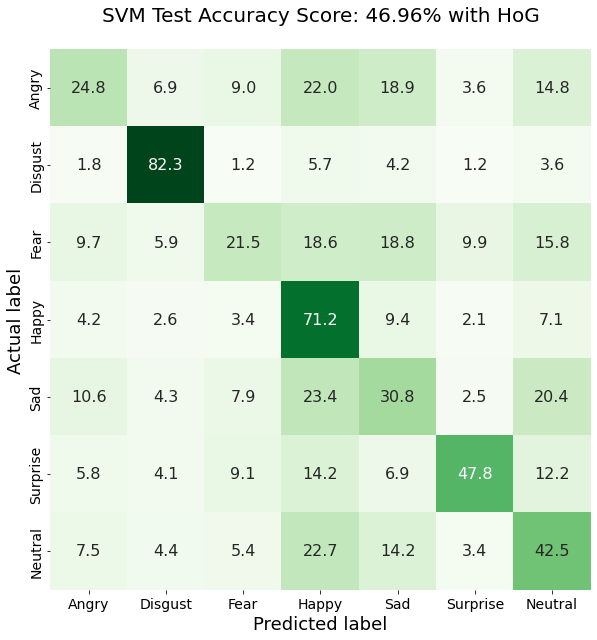

In [ ]:
svm_cm = confusion_matrix(y_test, y_pred)
one_plot_cm(svm_cm,score,'SVM')

In [40]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=2, weights='distance', metric='minkowski')
knn.fit(X_train, y_train)
filename = 'knn_hog.sav'
pickle.dump(svm, open(filename, 'wb'))

In [41]:
filename = 'knn_hog.sav'
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = knn.predict(X_test)
print('Train Accuracy: %.3f' % knn.score(X_train, y_train))
print('Test Accuracy: %.3f' % knn.score(X_test, y_test))

Train Accuracy: 0.998
Test Accuracy: 0.517


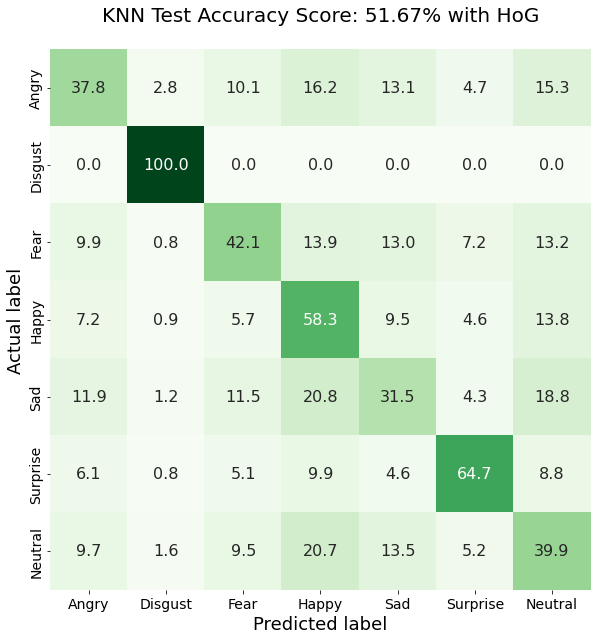

In [42]:
knn_cm = confusion_matrix(y_test, y_pred)
knn_score=  knn.score(X_test, y_test)
one_plot_cm(knn_cm,knn_score,'KNN')

In [ ]:
#emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}
emotion_labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
lb = emotions.values()
lb

dict_values([0, 1, 2, 3, 4, 5, 6])

In [ ]:
plot_cm(confusion_matrix(y_test, y_pred),confusion_matrix(y_test, y_pred),score, 'RandomForest', 'hog')

In [ ]:
plot_cm(confusion_matrix(y_test, y_pred),score, 'RandomForest')

In [ ]:
def plot_cm(cm, cm1,testscore,model_name, data):
  '''provide cm item and test score'''
  emotion_labels_cm = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
  cm_labels_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  cm_labels_norm = cm_labels_norm * 100.00

  cm_labels_norm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
  cm_labels_norm1 = cm_labels_norm * 100.00

  #plt.figure(figsize=(9,9))
  fig, ax  = plt.subplots(1, 2, sharex='col', figsize=(18, 9))
  sns.heatmap(cm_labels_norm,
              annot=True, 
              annot_kws={'size':16},
              fmt=".1f",
            cmap='Greens', #Spectral 'binary'
            xticklabels=[i for i in emotion_labels_cm.values()],
            yticklabels=[i for i in emotion_labels_cm.values()],
            square=True,
            cbar=False, 
            ax=ax[0])
  sns.heatmap(cm_labels_norm1,
            annot=True, 
            annot_kws={'size':16},
            fmt=".1f",
          cmap='Greens', #Spectral 'binary'
          xticklabels=[i for i in emotion_labels_cm.values()],
          yticklabels=[],
          square=True,
          cbar=False, 
          ax=ax[1])
  plt.title('{} Test Accuracy Score: {}% with {}\n'.format(model_name, "%.2f" % (testscore*100.0), data), size=20)
  plt.xticks(size=14)
  plt.yticks(size=14)
  ax[0].ylabel('Actual label', size=18)
  plt.xlabel('Predicted label', size=18)
  plt.tight_layout()
  plt.show()

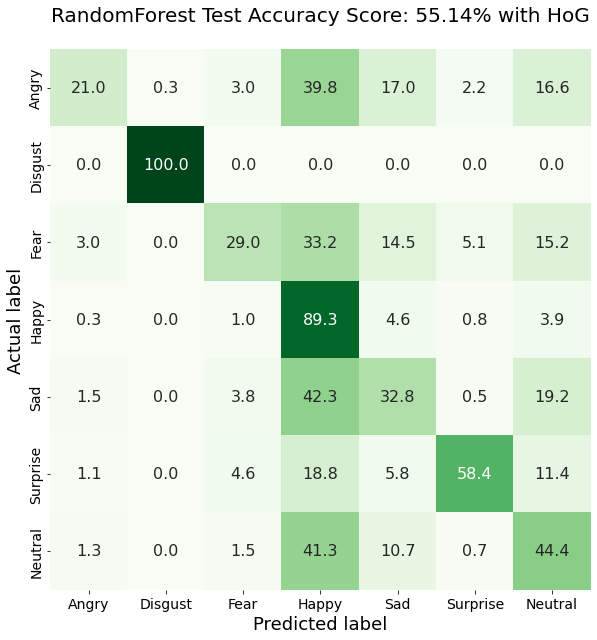

In [ ]:
plot_cm(confusion_matrix(y_test, y_pred),score, 'RandomForest', 'HoG')

In [ ]:
loaded_model = pickle.load(open(rf_model_dump, 'rb'))

In [ ]:
pred = loaded_model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.21      0.32       957
           1       1.00      1.00      1.00       830
           2       0.66      0.29      0.40      1024
           3       0.45      0.89      0.60      1774
           4       0.42      0.33      0.37      1247
           5       0.82      0.58      0.68       831
           6       0.43      0.44      0.44      1233

    accuracy                           0.55      7896
   macro avg       0.64      0.54      0.55      7896
weighted avg       0.60      0.55      0.53      7896



### VotingClassifier

In [20]:
rf = RandomForestClassifier(n_estimators=2000,max_features='sqrt',
                            random_state=101, n_jobs=-1,max_depth=60, min_samples_leaf=1, min_samples_split=2)
  
sdg = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3,
                      alpha= 0.0001, learning_rate= 'optimal', 
                      loss='hinge', penalty= 'l1')

svm = SVC(C=10.0, random_state=1, kernel='rbf', gamma='auto')
knn = KNN(n_neighbors=2, weights='distance', metric='minkowski')

In [22]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('knn', knn), ('SDG', sdg),('SVM', svm)], voting='hard')
model.fit(X_train,y_train)
filename = 'VotingClassifier_HoG.sav'
pickle.dump(svm, open(filename, 'wb'))


In [23]:
model_score=  model.score(X_test, y_test)

In [ ]:
model_score

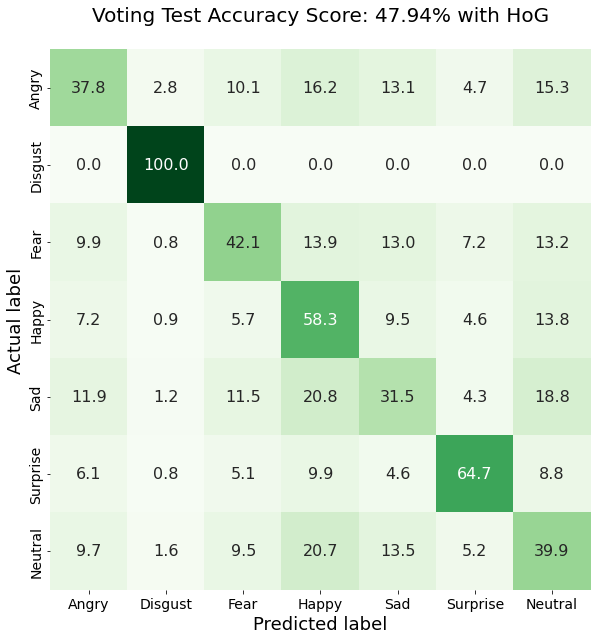

In [44]:
model_y_pred = model.predict(X_test)
model_cm = confusion_matrix(y_test, y_pred)
one_plot_cm(model_cm,model_score,'Voting')

In [105]:
 cr= performance_report(cm)

Performance report of the model is :
              Precision    Recall  F1-Score   Support

        Angry      0.32      0.35      0.34       957
      Disgust      0.63      0.87      0.73       830
         Fear      0.38      0.28      0.32      1024
        Happy      0.52      0.74      0.61      1774
          Sad      0.37      0.18      0.24      1247
     Surprise      0.73      0.44      0.55       831
      Neutral      0.41      0.44      0.42      1233

     Accuracy                          0.48      7896
    Macro_avg      0.48      0.47      0.46      7896
 Weighted_avg      0.47      0.48      0.46      7896


In [118]:
cm=Confusion_matrix(y_test, model_y_pred, target_names=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])

Confusion Matrix of given model is :
Count=7896           Angry      Disgust    Fear       Happy      Sad        Surprise   Neutral   
Actual Angry          135        125        86         321        73         52         165       
Actual Disgust        105        130        92         256        63         47         137       
Actual Fear           149        152        101        317        76         62         167       
Actual Happy          213        238        167        620        134        116        286       
Actual Sad            168        181        111        383        110        80         214       
Actual Surprise       117        136        64         259        48         63         144       
Actual Neutral        159        179        117        392        111        76         199       


# Data preprocessing, EDA & Transformation

In [ ]:
# Data files directory
train_dir = '/content/train'
test_dir = '/content/test'
emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}

In [ ]:
def import_data(dir):
  '''this funciton will be used to extract image data into 2 list,
  1st list labels will contain labels information and 
  2nd list images will contain flaten pixels of each image.
  - image data is already reshed into 48,48 numpy array'''

  data=[]
  for directory in sorted(glob(dir+'/*')):
    image_files = glob(directory + '/*.jpg')
    label = directory.split('/')[-1]
    for image_file in image_files:
      image = resize(imread(image_file), (48,48))
      data.append(( label, image))
  return data

In [ ]:
def import_data(dir_loc):
  '''this funciton will be used to extract image data into 3 list, list file will contain file name
  list labels will contain labels information and list images will contain flaten pixels of each image'''
  data=[]
  # train_files = []
  # train_labels = []
  # train_images = []
  for dirname, dirs, filenames in os.walk(dir_loc, topdown=True):
      cat = dirname.replace(dir_loc, '')
      if cat != '':
          cat = cat.replace('/', '')
          for filename in filenames:
              file = os.path.join(dirname, filename)
              image = mpimg.imread(file).flatten()
              data.append((file, cat, image))
              # train_files.append(file)
              # train_images.append(image)
              # train_labels.append(cat)
  return data

In [ ]:
#processing data and saving it in list 
# train_file, train_label, train_image = import_data(train_dir)
# print('length of each traning list: ', len(train_file), len(train_label), len(train_image))

#or create a DF 

df_train = pd.DataFrame(data = import_data(train_dir), 
                  columns = ['label','image'])
print(df_train.shape)
df_train.head(2)

(28709, 2)


,label,image
0,angry,"[[0.8235294117647012, 0.5960784313725466, 0.42..."
1,angry,"[[0.2627450980392157, 0.3098039215686276, 0.34..."


In [ ]:
df_train.label.unique()
#emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [ ]:
df_train.label = df_train.label.apply(lambda x: emotions[x])
df_train.label.unique()

array([0, 1, 2, 3, 6, 4, 5])

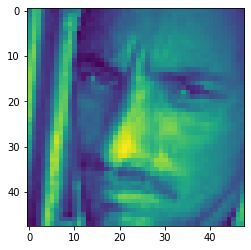

In [ ]:
#visualizing sample image
plt.imshow(df_train['image'][100])

In [ ]:
#checking forn null nalue 
df_train.image.isnull().sum()

0

## DATA NORMALIZATION

##imbalance data 

In [ ]:
Xtr_b = np.array(X_train_org)
Xtr_b = np.stack(Xtr_b, axis = 0)
Xtr_b = Xtr_b.reshape(28709, 48,48)
y_tr = np.array(y_train_org)
print(Xtr_b.shape,y_tr.shape)

(28709, 48, 48) (28709,)


In [ ]:
print(Xtr_b.shape,y_tr.shape)

### under sample

In [ ]:
pp = Pipeline([('rus',RandomUnderSampler(random_state=0, replacement=False))])
#pp = Pipeline([('tk',TomekLinks()),('ros',RandomUnderSampler(random_state=0))])
train_image_usample, train_label_usample = pp.fit_resample(Xtr_b.reshape(Xtr_b.shape[0],48*48), y_tr)
print(Counter(train_label_usample))
train_image_usample = train_image_usample.reshape(train_image_usample.shape[0], 48, 48)
print(train_image_usample.shape,train_label_usample.shape)

Counter({0: 436, 1: 436, 2: 436, 3: 436, 4: 436, 5: 436, 6: 436})
(3052, 48, 48) (3052,)


In [ ]:
unique, counts = np.unique(train_label_usample, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 436]
 [  1 436]
 [  2 436]
 [  3 436]
 [  4 436]
 [  5 436]
 [  6 436]]


In [ ]:
#print(len(X_train_org), len(X_test_org), len(y_train_org), len(y_test_org))
Xt_b = np.array(X_test_org)
Xt_b = np.stack(Xt_b, axis = 0)
Xt_b = Xt_b.reshape(7178, 48,48)
yt = np.array(y_test_org)
print(yt.shape, Xt_b.shape)

(7178,) (7178, 48, 48)


In [ ]:
pp = Pipeline([('rus',RandomUnderSampler(random_state=0, replacement=False))])
test_image_usample, test_label_usample = ppt.fit_resample(Xt_b.reshape(Xt_b.shape[0],48*48), yt)
print(Counter(test_label_usample))
test_image_usample = test_image_usample.reshape(test_image_usample.shape[0], 48, 48)
c

unique, counts = np.unique(test_label_usample, return_counts=True)
print(np.asarray((unique, counts)).T)

Counter({0: 1716, 1: 1716, 2: 1716, 3: 1716, 6: 1716, 4: 1716, 5: 1716})
(12012, 48, 48) (12012,)
[[   0 1716]
 [   1 1716]
 [   2 1716]
 [   3 1716]
 [   4 1716]
 [   5 1716]
 [   6 1716]]


### OverSample

In [ ]:
Xtr_b = np.array(X_train_org)
Xtr_b = np.stack(Xtr_b, axis = 0)
Xtr_b = Xtr_b.reshape(28709, 48,48)
y_tr = np.array(y_train_org)
print(Xtr_b.shape,y_tr.shape)

In [ ]:
# pp = Pipeline([('rus',RandomUnderSampler(random_state=0, replacement=False))])
pp = Pipeline([('tk',TomekLinks()),('ros',RandomOverSampler(random_state=0))])
train_image_array, train_image_label = pp.fit_resample(Xtr_b.reshape(Xtr_b.shape[0],48*48), y_tr)
print(Counter(train_image_label))
train_image_array = train_image_array.reshape(train_image_array.shape[0], 48, 48)

Counter({0: 7025, 1: 7025, 2: 7025, 3: 7025, 6: 7025, 4: 7025, 5: 7025})


In [ ]:
train_image_array.shape

(49175, 48, 48)

In [ ]:
print(train_image_label.shape)
unique, counts = np.unique(train_image_label, return_counts=True)
print(np.asarray((unique, counts)).T)

(49175,)
[[   0 7025]
 [   1 7025]
 [   2 7025]
 [   3 7025]
 [   4 7025]
 [   5 7025]
 [   6 7025]]


In [ ]:
train_images = train_image_array.reshape((train_image_array.shape[0], 48, 48))
train_images = train_images.astype('float32')
train_images.shape
#(49175, 48, 48) - shpae 

In [ ]:
def sample_plot(x,y=None):
    #x, y are numpy arrays
    n = 20
    samples = random.sample(range(x.shape[0]),n)
    
    fig, axs = plt.subplots(2,10, figsize=(25,5), sharex=True, sharey=True)
    ax = axs.ravel()
    for i in range(n):
        ax[i].imshow(x[samples[i],:,:], cmap=plt.get_cmap('gray'))
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        if y is not None:
            ax[i].set_title(emotions_labelss[y[samples[i]]])

In [ ]:
emotions_labelss = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

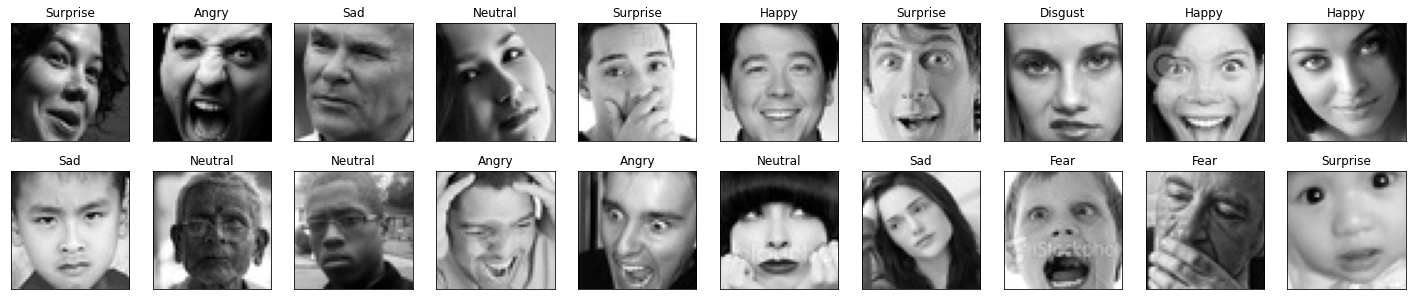

In [ ]:
sample_plot(train_image_array, train_image_label)

In [ ]:
X_train_hog_b = np.array([feature.hog(image) for image in train_images])
print(X_train_hog_b.shape,train_image_label.shape)

(49175, 1296) (49175,)


In [ ]:
#print(len(X_train_org), len(X_test_org), len(y_train_org), len(y_test_org))
Xt_b = np.array(X_test_org)
Xt_b = np.stack(Xt_b, axis = 0)
Xt_b = Xt_b.reshape(7178, 48,48)
yt = np.array(y_test_org)
print(yt.shape, Xt_b.shape)

(7178,) (7178, 48, 48)


In [ ]:
# pp = Pipeline([('rus',RandomUnderSampler(random_state=0, replacement=False))])
ppt = Pipeline([('tk',TomekLinks()),('ros',RandomOverSampler(random_state=0))])
test_image_array, test_image_label = ppt.fit_resample(Xt_b.reshape(Xt_b.shape[0],48*48), yt)
print(Counter(test_image_label))
test_image_array = test_image_array.reshape(test_image_array.shape[0], 48, 48)
print(test_image_array.shape,test_image_label.shape )

unique, counts = np.unique(test_image_label, return_counts=True)
print(np.asarray((unique, counts)).T)

Counter({0: 1716, 1: 1716, 2: 1716, 3: 1716, 6: 1716, 4: 1716, 5: 1716})
(12012, 48, 48) (12012,)
[[   0 1716]
 [   1 1716]
 [   2 1716]
 [   3 1716]
 [   4 1716]
 [   5 1716]
 [   6 1716]]


In [ ]:
test_images = test_image_array.reshape((test_image_array.shape[0], 48, 48))
test_images = test_images.astype('float32')
print(test_images.shape)
X_test_hog_b = np.array([feature.hog(image) for image in test_images])
print(X_test_hog_b.shape,test_image_label.shape)

(12012, 48, 48)
(12012, 1296) (12012,)


## Image Augmention

In [ ]:
import copy 
df_copy = copy.copy(df_train)
col = df_copy.columns
print(col)

Index(['label', 'image'], dtype='object')


In [ ]:
df_copy['image'][0].shape

(48, 48)

In [ ]:
#horiontal flip
df_copy['image'] = df_copy['image'].apply(lambda x: (np.flip(x, axis=1)).reshape(48,48))

In [ ]:
df_copy['image'][0].shape

(48, 48)

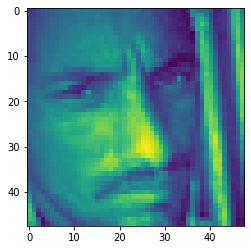

In [ ]:
plt.imshow(df_copy['image'][100]) #fliped image 

In [ ]:
#combined both df
# df_aug =  pd.concat([df_train, df_copy], axis=0)
df_aug = np.concatenate((df_train, df_copy))
print(df_aug.shape)
# df_aug.head(1)

(57418, 2)


## Affine transformation

In [ ]:
df_t = copy.copy(df_train)
df_t.head(2)

,label,image
0,0,"[[0.8235294117647012, 0.5960784313725466, 0.42..."
1,0,"[[0.2627450980392157, 0.3098039215686276, 0.34..."


In [ ]:
w, h = df_t.image[0].shape
print(w, h )

48 48


In [ ]:
#Apply identity transform:
mat_identity = np.array([[1,0,0],[0,1,0],[0,0,1]])
#Apply identity transform:
mat_reflect = np.array([[1,0,0],[0,-1,0],[0,0,1]]) @ np.array([[1,0,0],[0,1,-h],[0,0,1]])
#Scale the image (0.75 times along the x axis and 1.25 times along the y axis):
s_x, s_y = 0.75, 1.25
mat_scale = np.array([[s_x,0,0],[0,s_y,0],[0,0,1]])
#Rotate the image by 30° counter-clockwise. It's a composite operation—first, you will need to shift/center the image, 
#apply rotation, and then apply inverse shift:
theta = np.pi/6
mat_rotate = np.array([[1,0,w/2],[0,1,h/2],[0,0,1]]) @ np.array([[np.cos(theta),
                                                                  np.sin(theta),0],
                                                                 [np.sin(theta),-np.cos(theta),0],
                                                                 [0,0,1]]) @ np.array([[1,0,-w/2],[0,1,-h/2],[0,0,1]])

#Apply shear transform to the image:
lambda1 = 0.5
mat_shear = np.array([[1,lambda1,0],[lambda1,1,0],[0,0,1]])

In [ ]:
#image before transformation 
plt.imshow(df_t['image'][100])

NameError: ignored

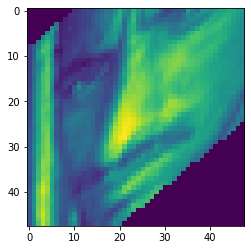

In [ ]:
#App.y transformation to the image 
mat_all = mat_identity @ mat_reflect @ mat_scale @ mat_rotate @ mat_shear
df_t['image'] = df_t['image'].apply(lambda x: ndi.affine_transform(x, mat_all))
plt.imshow(df_t['image'][100])


In [ ]:
print ('shape of augmented dataframe: ',df_aug[0, 1].shape)
print ('shape of augmented dataframe: ',df_t['image'][0].shape)

shape of augmented dataframe:  (48, 48)
shape of augmented dataframe:  (48, 48)


In [ ]:
df_aug[0, 1].shape

(48, 48)

In [ ]:
# Combined both Augmentd DF and New trasformed DF 
#combined both DF
# df_final =  pd.concat([df_aug, df_t], axis=0)
df_final = np.concatenate((df_aug, df_t))
print(df_final.shape)

(86127, 2)


In [ ]:
#shape of individual image 
df_final[0, 1].shape

(48, 48)

## SIFT Data Initial Test 

In [ ]:
#emotion_labels = {0:‘angry’, 2:‘fear’, 3:‘happy’, 4:‘sad’, 5:‘surprise’, 6:‘neutral’}
df_sift = pd.read_csv('/content/sift_data.csv')
print(df_sift.shape)
df_sift.head(2)

(35322, 3)


,usage,emotion,histogram
0,train,3,4 3 6 1 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
1,train,3,2 8 4 4 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...


In [ ]:
print('Columns: ', df_sift.columns)
print('shape of df: ', df_sift.shape)
print('unique emotion labels: ', df_sift.emotion.unique())
print('data type for (emotion, data): ', type(df_sift.emotion[0]), type(df_sift.histogram[0]), len(df_sift.histogram[0]))

Columns:  Index(['usage', 'emotion', 'histogram'], dtype='object')
shape of df:  (35322, 3)
unique emotion labels:  [3 4 2 5 6 0]
data type for (emotion, data):  <class 'numpy.int64'> <class 'str'> 57


In [ ]:
print('len of histogram: ',len(df_sift.histogram[0].split(' ')))
print( 'value counts for each emotion: ','\n', df_sift.emotion.value_counts())

len of histogram:  29
value counts for each emotion:  
 3    8987
6    6195
4    6076
2    5119
0    4945
5    4000
Name: emotion, dtype: int64


In [ ]:
emotion_remap = {0:0, 2:1, 3:2, 4:3, 5:4, 6:5}
print('data type for emotion: ',type(df_sift.emotion[0]))


data type for emotion:  <class 'numpy.int64'>


In [ ]:
#remapping each emotion to a new label
df_sift.emotion = df_sift.emotion.apply(lambda x: emotion_remap[x])
print( 'value counts for each emotion after remaping: ','\n', sorted(df_sift.emotion.value_counts()))

value counts for each emotion after remaping:  
 [4000, 4945, 5119, 6076, 6195, 8987]


In [ ]:
#chikako's funciton 
def load_data(df, sift):
    image_data = []
    
    for index, row in df.iterrows():
        if sift == 1:
            field = row.histogram
        else:
            field = row.pixels
        image = np.fromstring(field, dtype=int, sep=' ')
        #scale = np.fromstring(row.scaled_pixels, dtype=int, sep=' ')
        #image = np.reshape(image, (48, 48))
        image_data.append(image)
        #image_scaled.append(scale)
        
    return image_data

In [ ]:
df_train = df_sift[df_sift['usage']=='train']
df_test = df_sift[df_sift['usage']=='test']
train_data = load_data(df_train, 1)
train_target = list(df_train.emotion)
test_data = load_data(df_test, 1)
test_target = list(df_test.emotion)

In [ ]:
X_train = np.array(train_data)
y_train = np.array(train_target)
X_test = np.array(test_data)
y_test = np.array(test_target)
print('shape of each data set: \n(X_train, y_train, X_test ,y_test)\n', 
      X_train.shape,y_train.shape,X_test.shape,y_test.shape)


shape of each data set: 
(X_train, y_train, X_test ,y_test)
 (28257, 29) (28257,) (7065, 29) (7065,)


In [ ]:
#running basic SVC
svm = SVC(C=5, random_state=1, kernel='rbf', gamma=0.01)
svm.fit(X_train, y_train)
y_pred2 = svm.predict(X_test)
print('Test Accuracy: %.3f' % svm.score(X_test, y_test))
y_test2 = y_test

In [ ]:
#Basic SGDClassifier
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.2251946213729653

In [ ]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5) 

In [ ]:
cross_val_score(sgd, X_train, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


array([0.1692324 , 0.20660367, 0.14555685])

In [ ]:
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge',
        'perceptron'] 
penalty = ['l1', 'l2', 'elasticnet']

alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']

class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}] 

eta0 = [1, 10, 100] 

param_distributions = dict(loss=loss,penalty=penalty, alpha=alpha,learning_rate=learning_rate,
                           class_weight=class_weight, eta0=eta0)


In [ ]:
# sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5) 

random = RandomizedSearchCV(estimator=sgd,
                            param_distributions=param_distributions, 
                            scoring='roc_auc', 
                            verbose=1, n_jobs=-1, 
                            n_iter=1000) 

In [ ]:
random_result = random.fit(X_train, y_train) 

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
model = RandomForestClassifier(n_estimators=50,max_features='auto',random_state=101, n_jobs=-1)
model.fit(X_train,y_train)
model_pred = model.predict(X_test)
accuracy_score(model_pred,y_test)

0.2005661712668082

In [ ]:
pip install parfit

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
import parfit.parfit as pf
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split
# X_train.shape,y_train.shape,X_test.shape,y_test.shape)
# X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_test, y_test, test_size = 0.5, shuffle = True)

In [ ]:


grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    #'n_iter': [1000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier, paramGrid,
                                                        X_train, y_train, X_val, y_val,
                                                        metric = roc_auc_score,
                                                        scoreLabel = "AUC")

print(bestModel, bestScore)

In [ ]:
print('shape of each data set: \n(X_train, y_train, X_test ,y_test)\n', 
      X_train.shape,y_train.shape,X_test.shape,X_test.shape)


shape of each data set: 
(X_train, y_train, X_test ,y_test)
 (28257, 29) (28257,) (7065, 29) (7065,)


In [ ]:

parameters = {'penalty': ['l2', None],
              'alpha': [1e-07, 1e-06, 1e-05, 1e-04],
              'eta0': [0.01, 0.1, 1, 10]}
sgd_lr = SGDClassifier(loss='log', learning_rate='constant', 
                      eta0=0.01, fit_intercept=True, max_iter=50)
grid_search = GridSearchCV(sgd_lr, parameters, 
                           n_jobs=-1, cv=3)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'alpha': 1e-05, 'eta0': 0.01, 'penalty': 'l2'}


In [ ]:
sgd_lr_best = grid_search.best_estimator_
accuracy = sgd_lr_best.score(X_test , y_test)

print('The accuracy on testing set is: {0:.1f}%'.format(accuracy*100))

The accuracy on testing set is: 14.2%


In [ ]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

model = SGDClassifier(max_iter=5000)
clf = GridSearchCV(model, param_grid=params)



In [ ]:
clf.fit(X_train, y_train)
print(clf.best_score_)

0.255299571201159


In [ ]:
sgd_lr_best = clf.best_estimator_
accuracy = sgd_lr_best.score(X_test , X_test)

print('The accuracy on testing set is: {0:.1f}%'.format(accuracy*100))

In [ ]:
print(grid_search.best_params_)

{'alpha': 1e-05, 'eta0': 0.01, 'penalty': 'l2'}


In [ ]:
clf.best_estimator_

SGDClassifier(alpha=0.1, loss='log', max_iter=5000, penalty='l1')

In [ ]:
#Basic SGDClassifier
# X_train.shape,y_train.shape,X_test.shape,X_test.shape)
sgd_clf = SGDClassifier(random_state=42, alpha=0.1, loss='log', max_iter=5000, penalty='l1', tol=1e-3)
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.25095541401273885

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.25095541401273885

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In [ ]:
grid_search

In [ ]:
print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

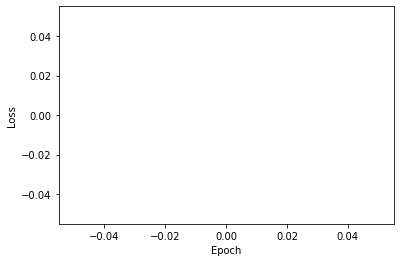

In [ ]:
# from sklearn.linear_model import SGDRegressor

# model = SGDRegressor(verbose=1)

with DisplayLossCurve():
  clf.fit(X_train, y_train)

# OR

# with DisplayLossCurve(print_loss=True):
#   model.fit(X, Y)

In [ ]:
import sys
import io
import matplotlib.pyplot as plt

class DisplayLossCurve(object):
  def __init__(self, print_loss=False):
    self.print_loss = print_loss

  """Make sure the model verbose is set to 1"""
  def __enter__(self):
    self.old_stdout = sys.stdout
    sys.stdout = self.mystdout = io.StringIO()
  
  def __exit__(self, *args, **kwargs):
    sys.stdout = self.old_stdout
    loss_history = self.mystdout.getvalue()
    loss_list = []
    for line in loss_history.split('\n'):
      if(len(line.split("loss: ")) == 1):
        continue
      loss_list.append(float(line.split("loss: ")[-1]))
    plt.figure()
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    if self.print_loss:
      print("=============== Loss Array ===============")
      print(np.array(loss_list))
      
    return True

In [ ]:
random = GridSearchCV(estimator=sgd, param_distributions,
                            scoring='roc_auc', 
                            verbose=1, n_jobs=-1, 
                            n_iter=1000) 

In [ ]:
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier, random,
                                                        X_train, y_train, X_val, y_val,
                                                        metric = roc_auc_score,
                                                        scoreLabel = "AUC")

print(bestModel, bestScore)

In [ ]:
# image pre-processing

X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

## HOG SVC - test 

In [ ]:
#running basic SVC
svm = SVC(C=5, random_state=1, kernel='rbf', gamma=0.01)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_Test_hog)
# print('Test Accuracy: %.3f' % svm.score(X_test, y_test))
# y_test2 = y_test

In [ ]:
y_test = np.array(y_test_org)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.4612705488994149


array([[ 262,    0,   81,  200,  202,   45,  168],
       [  36,    0,   16,   18,   27,    5,    9],
       [ 116,    0,  218,  206,  204,  111,  169],
       [  85,    0,   60, 1348,  140,   36,  105],
       [ 144,    0,   99,  267,  447,   20,  270],
       [  49,    0,   79,  113,   57,  445,   88],
       [  97,    0,   62,  222,  215,   46,  591]])

In [ ]:
print('Test Accuracy: %.3f' % svm.score(X_Test_hog, y_test))

Test Accuracy: 0.461


In [ ]:
cm

array([[ 262,    0,   81,  200,  202,   45,  168],
       [  36,    0,   16,   18,   27,    5,    9],
       [ 116,    0,  218,  206,  204,  111,  169],
       [  85,    0,   60, 1348,  140,   36,  105],
       [ 144,    0,   99,  267,  447,   20,  270],
       [  49,    0,   79,  113,   57,  445,   88],
       [  97,    0,   62,  222,  215,   46,  591]])

NameError: ignored

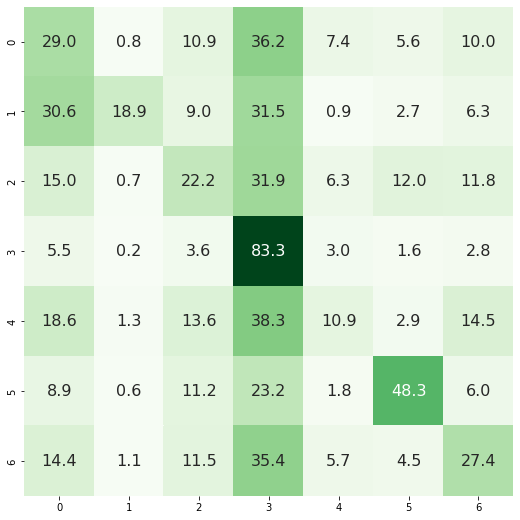

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# confusion matrix with actual label names
#cm_labels = confusion_matrix(test_labels, predicted_labels.argmax(axis=1))
# normalizing the values
cm_labels_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_labels_norm = cm_labels_norm * 100.00

plt.figure(figsize=(9,9))
sns.heatmap(cm_labels_norm,
            annot=True, 
            annot_kws={'size':16},
            fmt=".1f",
           cmap='Greens',
           xticklabels=[i for i in emotions.values()],
           yticklabels=[i for i in emotions.values()],
           square=True,
           cbar=False)
plt.title('Test Accuracy Score: {0}%\n'.format("%.2f" % (results[1]*100.0)), size=24)
plt.tight_layout()
plt.xticks(size=14)
plt.yticks(size=14)
plt.ylabel('Actual label', size=18)
plt.xlabel('Predicted label', size=18)
plt.show()

## svm with balanced data 

In [ ]:
#print(X_train_hog_b.shape,train_image_label.shape)
#print(X_test_hog_b.shape,test_image_label.shape)

svm_b = SVC(C=5, random_state=1, kernel='rbf', gamma=0.01)
svm_b.fit(X_train_hog_b, train_image_label)
y_pred_p = svm_b.predict(X_test_hog_b)
accuracy_score(test_image_label, y_pred_p)


0.4566267066267066

In [ ]:
cm_SVM_B = confusion_matrix(test_image_label, y_pred_p)
cm_SVM_B

array([[ 586,  162,  161,  153,  277,  121,  256],
       [ 300, 1047,   84,   79,  105,   51,   50],
       [ 232,  148,  442,  166,  307,  233,  188],
       [ 148,   71,  107, 1053,  159,   65,  113],
       [ 271,  115,  191,  187,  556,   86,  310],
       [ 132,   63,  158,  114,   81, 1064,  104],
       [ 211,   79,  143,  161,  289,   96,  737]])

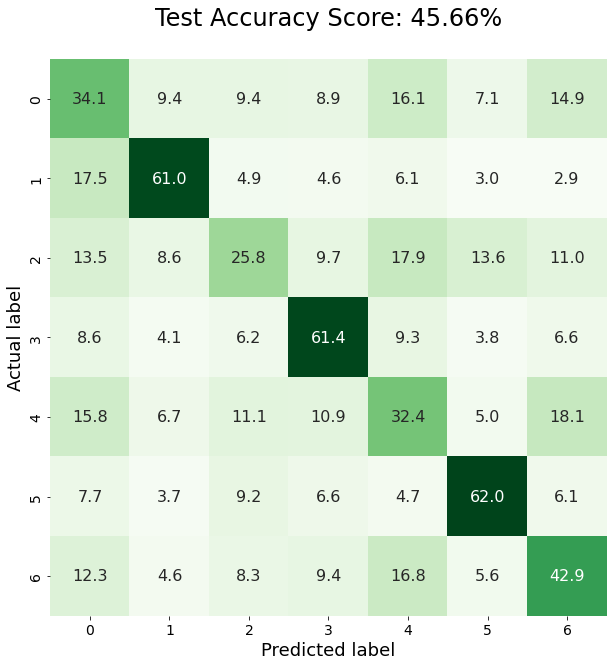

In [ ]:
cm_labels_norm = cm_SVM_B.astype('float') / cm_SVM_B.sum(axis=1)[:, np.newaxis]
cm_labels_norm = cm_labels_norm * 100.00

plt.figure(figsize=(9,9))
sns.heatmap(cm_labels_norm,
            annot=True, 
            annot_kws={'size':16},
            fmt=".1f",
           cmap='Greens',
           xticklabels=[i for i in emotions.values()],
           yticklabels=[i for i in emotions.values()],
           square=True,
           cbar=False)
plt.title('Test Accuracy Score: {0}%\n'.format("%.2f" % (0.45662*100.0)), size=24)
plt.tight_layout()
plt.xticks(size=14)
plt.yticks(size=14)
plt.ylabel('Actual label', size=18)
plt.xlabel('Predicted label', size=18)
plt.show()

## start data processing from CSV file 

In [ ]:
#create a dataframe using the data csv
df = pd.read_csv('/content/train.csv')
print(df.columns)
print(df.shape)
df.head(2)

Index(['feature 0', 'feature 1', 'feature 2', 'feature 3', 'feature 4',
       'feature 5', 'feature 6', 'feature 7', 'feature 8', 'feature 9',
       ...
       'feature 2295', 'feature 2296', 'feature 2297', 'feature 2298',
       'feature 2299', 'feature 2300', 'feature 2301', 'feature 2302',
       'feature 2303', 'emotion'],
      dtype='object', length=2305)
(28698, 2305)


,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 2295,feature 2296,feature 2297,feature 2298,feature 2299,feature 2300,feature 2301,feature 2302,feature 2303,emotion
0,42,43,57,59,50,50,52,54,51,55,...,33,43,48,49,59,117,161,173,181,disgust
1,125,126,128,119,112,168,177,170,173,174,...,131,107,84,77,73,59,106,200,208,disgust


In [ ]:
plt.imshow(np.array(df.pixels[0].split(' ')).astype('float32').reshape(48,48))

In [ ]:
fig = plt.figure(1,(14,14))
x = 0

for label in sorted(df.emotion.unique()):
  for i in range(3):
    img = df[df.emotion == label].pixels.iloc[x]
    img = img.reshape(48,48)
    x +=1

    ax = plt.subplot(7,7,x)
    ax.imshow(img)
    ax.set_title(emotions_label_text[label])
    plt.tight_layout()

In [ ]:
#create a dataframe using the data csv
df = pd.read_csv('/content/data.csv')
print(df.columns)
print(df.shape)
df.head(2)

Index(['Unnamed: 0', 'file', 'emotion', 'pixels'], dtype='object')
(7178, 4)


,Unnamed: 0,file,emotion,pixels
0,0,PrivateTest_45699463.jpg,3,5 4 5 9 10 9 10 12 8 14 13 17 24 26 36 48 67 7...
1,1,PrivateTest_61855708.jpg,3,19 21 22 18 20 21 16 18 19 18 20 23 23 14 16 1...


In [ ]:
df.drop(columns='Unnamed: 0', inplace=True)
print(df.columns)
df.head(2)

Index(['file', 'emotion', 'pixels'], dtype='object')


,file,emotion,pixels
0,PrivateTest_45699463.jpg,3,5 4 5 9 10 9 10 12 8 14 13 17 24 26 36 48 67 7...
1,PrivateTest_61855708.jpg,3,19 21 22 18 20 21 16 18 19 18 20 23 23 14 16 1...


In [ ]:
df.tail()

NameError: ignored

In [ ]:
np.array(df.pixels[0].split(' ')).astype('float32').reshape(48,48)

array([[ 5.,  4.,  5., ..., 12.,  3.,  8.],
       [ 3.,  5.,  7., ..., 10.,  8.,  8.],
       [ 2.,  6.,  8., ...,  3.,  8.,  5.],
       ...,
       [ 8.,  8., 10., ..., 13., 16., 13.],
       [11.,  7.,  8., ..., 19., 16.,  8.],
       [15.,  7., 10., ..., 17., 13., 11.]], dtype=float32)

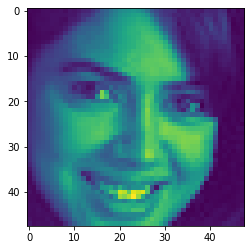

In [ ]:
plt.imshow(np.array(df.pixels[0].split(' ')).astype('float32').reshape(48,48))

In [ ]:
df['pixels']= df['pixels'].apply(lambda x: np.array(x.split(' ')).astype('float32').reshape(48,48))

In [ ]:
df['pixels'][0].shape

(48, 48)

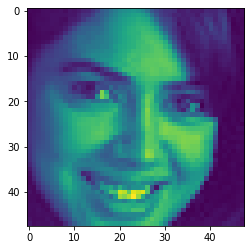

In [ ]:
plt.imshow(df['pixels'][0])

In [ ]:
df.head()

,file,emotion,pixels
0,PrivateTest_45699463.jpg,3,"[[5.0, 4.0, 5.0, 9.0, 10.0, 9.0, 10.0, 12.0, 8..."
1,PrivateTest_61855708.jpg,3,"[[19.0, 21.0, 22.0, 18.0, 20.0, 21.0, 16.0, 18..."
2,PublicTest_53681781.jpg,3,"[[228.0, 229.0, 230.0, 229.0, 228.0, 227.0, 22..."
3,PrivateTest_52109800.jpg,3,"[[25.0, 33.0, 43.0, 30.0, 46.0, 84.0, 105.0, 1..."
4,PublicTest_41104919.jpg,3,"[[33.0, 29.0, 15.0, 15.0, 20.0, 36.0, 40.0, 54..."


In [ ]:
# df['lables'] = df.file.apply(lambda x: x.split('_')[0])
df['lables'] = df.file.apply(lambda x: 1 if 'Test' in x else 0)
df['lables'].value_counts()

1    7178
Name: lables, dtype: int64

In [ ]:
# pip install opencv-python==3.4.3.18
import cv2

In [ ]:
gray = df['pixels'][0]

In [ ]:
gray.shape

(48, 48)

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')


In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

error: ignored

In [ ]:
# import numpy as np
# import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

     |████████████████████████████████| 25.0 MB 64.8 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

error: ignored

In [ ]:
from google.colab.patches import cv2

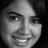

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(gray)

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = sorted(df.emotion.value_counts().index), y = df.emotion.value_counts())

In [ ]:
from skimage.io import imread
import numpy as np
import matplotlib.image as img
import pandas as pd

emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}
train_data = []
train_dir = '/content/train'
for dirname, dirs, filenames in os.walk(train_dir, topdown=True):
    cat = dirname.replace(train_dir, '')
    if cat != '':
        cat = cat.replace('/', '')
        for filename in filenames:
          file = os.path.join(dirname, filename)
          obj = mpimg.imread(os.path.join(dirname, filename)).flatten()
          # obj = imread(os.path.join(dirname, filename)).flatten()
          print(type(obj), len(obj), obj.shape)
          #train_data.append((emotions[cat], obj, file))
          train_data.append((1,obj))
          break


<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)


In [ ]:
df = pd.DataFrame(train_data)
df.shape

(7, 2)

In [ ]:
df.head(1)

,0,1
0,1,"[255, 254, 255, 232, 115, 102, 80, 62, 50, 53,..."


In [ ]:
len(df[1][0])

2304

In [ ]:
df.to_csv('gfgfile.csv',
              header = ['l','p'],
              index = None)

In [ ]:
df.to_csv('gfgfile.csv',
              header = None,
              index = None)

In [ ]:
df1 = pd.read_csv('/content/text')

In [ ]:
len(df1.head(1).split(' '))

AttributeError: ignored

In [ ]:
from skimage.io import imread
emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}
train_data = []
train_dir = '/content/train'
for dirname, dirs, filenames in os.walk(train_dir, topdown=True):
    cat = dirname.replace(train_dir, '')
    if cat != '':
        cat = cat.replace('/', '')
        for filename in filenames:
          file = os.path.join(dirname, filename)
          # obj = mpimg.imread(os.path.join(dirname, filename)).flatten()
          obj = imread(os.path.join(dirname, filename)).flatten()
          print(type(obj), len(obj), obj.shape)
          train_data.append((emotions[cat], obj, file))
          break


<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)


In [ ]:
train_data[0]

(5,
 array([255, 254, 255, ..., 127, 179, 191], dtype=uint8),
 '/content/train/surprise/Training_98972491.jpg')

In [ ]:
for x,y,z in train_data:
  print(len(y))
  print(len(str(y)))


2304
29
2304
29
2304
29
2304
29
2304
29
2304
29
2304
23


In [ ]:
df1 = pd.read_csv('/content/a_file.txt')
df1.head()

,(5,array([255,254,255,...,127,179,191],dtype=uint8),'/content/train/surprise/Training_98972491.jpg')
0,(6,array([201,201,203,...,97,92,91],dtype=uint8),'/content/train/neutral/Training_9443885.jpg')
1,(2,array([111,127,155,...,236,230,213],dtype=uint8),'/content/train/fear/Training_77272441.jpg')
2,(1,array([ 59,40,59,...,165,163,163],dtype=uint8),'/content/train/disgust/Training_33936842.jpg')
3,(0,array([150,171,199,...,101,103,101],dtype=uint8),'/content/train/angry/Training_58517344.jpg')
4,(4,array([147,151,144,...,0,1,0],dtype=uint8),'/content/train/sad/Training_7410773.jpg')


In [ ]:
df1[1]

KeyError: ignored

In [ ]:
a_list = ["abc", "def", "ghi"]
textfile = open("a_file.txt", "w")
for element in a_list:
    textfile.write(element + "\n")
textfile.close()

In [ ]:
type(train_data[0])

list

In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df.head(2)

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...


In [ ]:
print('len of trian data list:', len(train_data),len(train_label))
print('len of one pixel:', len(train_data[0]))
import pandas as pd
#converting out test data into a Dataframe 
df = pd.DataFrame(list(zip(train_label, train_data)),
               columns =['emotion','pixels'])

df.to_csv('file_name1.txt', index=None, sep='\t', mode='a')
df1 = pd.read_csv('/content/file_name1.txt')
print(len(df1.pixels[0]))
df1.head()

len of trian data list: 7 0
len of one pixel: 2304
29


,emotion,pixels,dir
0,5,[255 254 255 ... 127 179 191],/content/train/surprise/Training_98972491.jpg
1,6,[201 201 203 ... 97 92 91],/content/train/neutral/Training_9443885.jpg
2,2,[111 127 155 ... 236 230 213],/content/train/fear/Training_77272441.jpg
3,1,[ 59 40 59 ... 165 163 163],/content/train/disgust/Training_33936842.jpg
4,0,[150 171 199 ... 101 103 101],/content/train/angry/Training_58517344.jpg


In [ ]:
print('len of trian data list:', len(train_data))
print('len of one pixel:', len(train_data[1][1]))
import pandas as pd
#converting out test data into a Dataframe 
df = pd.DataFrame(train_data, columns = ['emotion','pixels','dir'])

len of trian data list: 7
len of one pixel: 2304


In [ ]:
df.to_csv('file_name1.txt', index=None, sep='\t', mode='a')
df1 = pd.read_csv('/content/file_name1.txt')
print(len(df1.pixels[0]))
df1.head()

29


,emotion,pixels,dir
0,5,[255 254 255 ... 127 179 191],/content/train/surprise/Training_98972491.jpg
1,6,[201 201 203 ... 97 92 91],/content/train/neutral/Training_9443885.jpg
2,2,[111 127 155 ... 236 230 213],/content/train/fear/Training_77272441.jpg
3,1,[ 59 40 59 ... 165 163 163],/content/train/disgust/Training_33936842.jpg
4,0,[150 171 199 ... 101 103 101],/content/train/angry/Training_58517344.jpg


In [ ]:
len(df1.pixels[0])

29

In [ ]:
#Extracting the data and saving it into list
#need to improve code with how we are extracting "cat"
from zipfile import ZipFile
import matplotlib.image as mpimg
import os
train_data = []
train_dir = '/content/train'
# test_dir = '/content/test'
emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}
with ZipFile('/content/archive.zip', 'r') as f:
  f.extractall()

for dirname, dirs, filenames in os.walk(train_dir, topdown=True):
    cat = dirname.replace(train_dir, '')
    if cat != '':
        cat = cat.replace('/', '')
        for filename in filenames:
          file = os.path.join(dirname, filename)
          obj = mpimg.imread(os.path.join(dirname, filename)).flatten()
          train_data.append((emotions[cat], obj, file))

In [ ]:
print('len of trian data list:', len(train_data))
print('len of one pixel:', len(train_data[1][1]))
import pandas as pd
#converting out test data into a Dataframe 
df = pd.DataFrame(train_data, columns = ['emotion','pixels','dir'])

len of trian data list: 7
len of one pixel: 2304


In [ ]:
print('shape of the traning dataframe: ', df.shape)
print('data type of the pixel: ', type(df.pixels[0]))

shape of the traning dataframe:  (7, 3)
data type of the pixel:  <class 'numpy.ndarray'>


In [ ]:
df.head(2)

,emotion,pixels,dir
0,5,"[255, 254, 255, 232, 115, 102, 80, 62, 50, 53,...",/content/train/surprise/Training_98972491.jpg
1,6,"[201, 201, 203, 198, 202, 207, 215, 212, 217, ...",/content/train/neutral/Training_9443885.jpg


In [ ]:
df.pixels[0]
print(len(df.pixels[0]))

2304


In [ ]:
train_img = df.pixels.apply(lambda x: x.reshape(48,48,1))

In [ ]:
df['pixels']

0    [255, 254, 255, 232, 115, 102, 80, 62, 50, 53,...
1    [201, 201, 203, 198, 202, 207, 215, 212, 217, ...
2    [111, 127, 155, 180, 189, 197, 191, 131, 75, 8...
3    [59, 40, 59, 63, 29, 26, 30, 24, 35, 64, 86, 9...
4    [150, 171, 199, 201, 138, 31, 49, 65, 77, 88, ...
5    [147, 151, 144, 153, 154, 155, 164, 164, 164, ...
6    [59, 60, 39, 27, 24, 51, 26, 10, 23, 20, 21, 3...
Name: pixels, dtype: object

In [ ]:
df.pixels[0].reshape(48,48)

array([[248, 247, 173, ..., 158, 160, 168],
       [253, 249, 186, ..., 159, 163, 161],
       [254, 254, 184, ..., 153, 157, 172],
       ...,
       [ 36,  42,  92, ...,   2,   0,   0],
       [ 42,  72, 139, ...,   0,   0,   1],
       [ 50, 127, 137, ...,   1,   1,   0]], dtype=uint8)

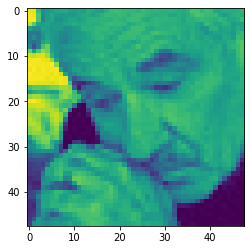

In [ ]:
#lets look at one image 
plt.imshow(df.pixels[0].reshape(48,48))

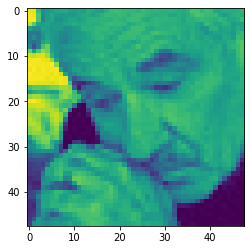

In [ ]:
#view an imapge directly from image file 
plt.imshow(mpimg.imread(df.dir[0]))

## Data visualization

In [ ]:
emotions_label_text = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}

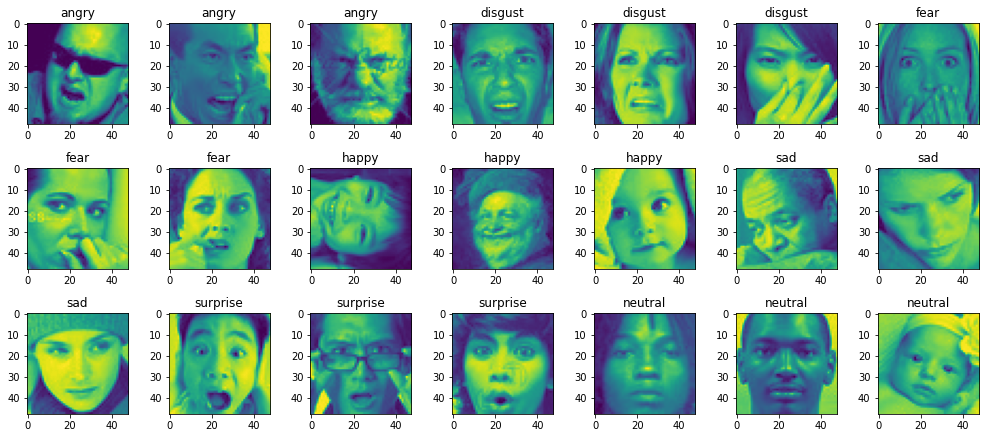

In [ ]:
fig = plt.figure(1,(14,14))
x = 0

for label in sorted(df.emotion.unique()):
  for i in range(3):
    img = df[df.emotion == label].pixels.iloc[x]
    img = img.reshape(48,48)
    x +=1

    ax = plt.subplot(7,7,x)
    ax.imshow(img)
    ax.set_title(emotions_label_text[label])
    plt.tight_layout()

# Model Testing & Exploring

## SGD

### Orginal Data

In [ ]:
#navigating to SGD dir
%cd drive/MyDrive/Colab Notebooks/facial-expression-recognition/SGD


[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/facial-expression-recognition/SGD'
/content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/SGD


In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/SGD'

In [ ]:
#Converting data to numpy array and reshaping it
X_train_org_array = np.array(X_train_org).reshape(28709,48*48 )
y_train_org_array = np.array(y_train_org)
X_test_org_array = np.array(X_test_org).reshape(7178,48*48 )
y_test_org_array = np.array(y_test_org)

In [ ]:
#Orginal Data 
sgd_org = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_org.fit(X_train_org_array, y_train_org_array)
y_pred_org = sgd_org.predict(X_test_org_array)
score_sgd_org=accuracy_score(y_test_org_array, y_pred_org)
cm_sgd_org = confusion_matrix(y_test_org_array, y_pred_org)
print(score_sgd_org)
cm_sgd_org

0.2709668431317916


array([[ 36,   4,  11, 141, 703,   5,  58],
       [  0,   9,   0,  16,  81,   1,   4],
       [ 14,   5,  38, 102, 788,  11,  66],
       [ 15,   6,  14, 679, 976,   0,  84],
       [ 25,   5,  16, 121, 985,   5,  90],
       [  8,   3,   7,  73, 642,  56,  42],
       [ 22,   4,  20, 174, 870,   1, 142]])

In [ ]:
#Saving the model in google drive 
filename = 'sgd_org.sav'
pickle.dump(sgd_org, open(filename, 'wb'))

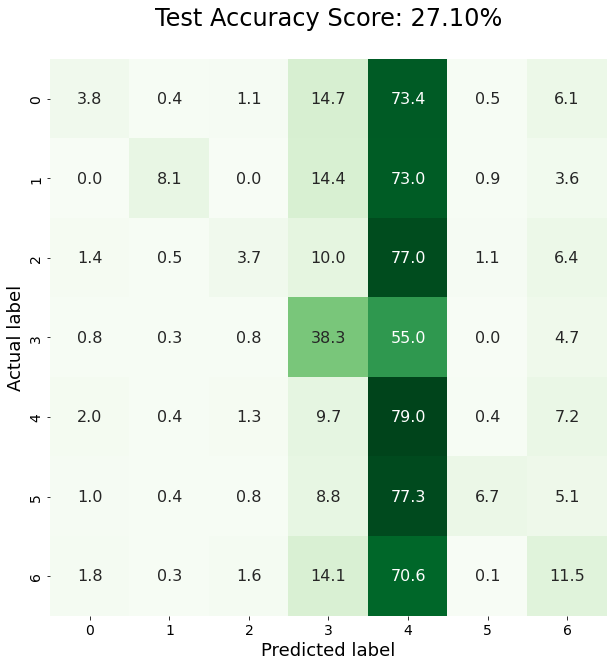

In [ ]:
plot_cm(cm_sgd_org,score_sgd_org)

### HoG

In [ ]:
#Orginal Data 
sgd_org_hog = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_org_hog.fit(X_train_hog, y_train_org_array)
y_pred_org = sgd_org_hog.predict(X_Test_hog)
score_sgd_org_hog=accuracy_score(y_test_org_array, y_pred_org)
cm_sgd_org_hog = confusion_matrix(y_test_org_array, y_pred_org)
print(score_sgd_org_hog)
cm_sgd_org_hog
#Saving the model in google drive 
filename = 'sgd_org_hog.sav'
pickle.dump(sgd_org_hog, open(filename, 'wb'))

0.4189189189189189


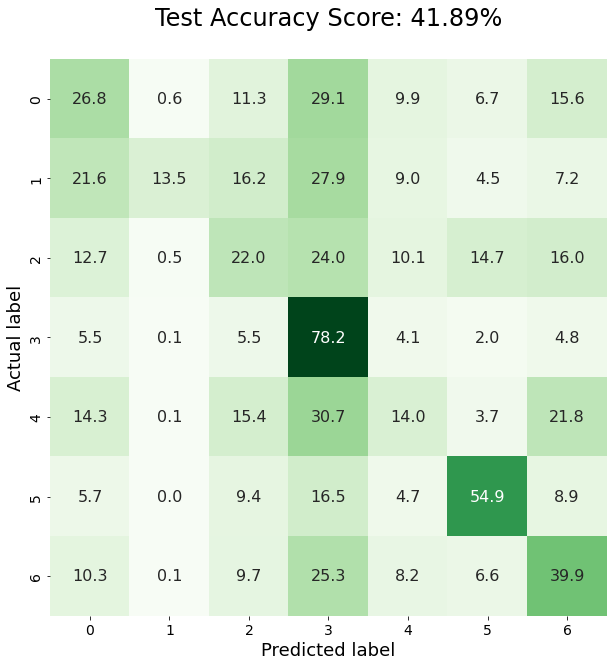

In [ ]:
plot_cm(cm_sgd_org_hog,score_sgd_org_hog)

In [ ]:
def plot_cm(cm,testscore):
  '''provide cm item and test score'''
  cm_labels_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  cm_labels_norm = cm_labels_norm * 100.00

  plt.figure(figsize=(9,9))
  sns.heatmap(cm_labels_norm,
              annot=True, 
              annot_kws={'size':16},
              fmt=".1f",
            cmap='Greens',
            xticklabels=[i for i in emotions.values()],
            yticklabels=[i for i in emotions.values()],
            square=True,
            cbar=False)
  plt.title('Test Accuracy Score: {0}%\n'.format("%.2f" % (testscore*100.0)), size=24)
  plt.tight_layout()
  plt.xticks(size=14)
  plt.yticks(size=14)
  plt.ylabel('Actual label', size=18)
  plt.xlabel('Predicted label', size=18)
  plt.show()

In [ ]:
xtr = resize(np.array(X_train_org).flatten(), (28709, 48*48))
#xt= np.array(X_test_org)
ytr= np.array(y_train_org)
yt= np.array(y_test_org)
xtr.shape

In [ ]:

unique, counts = np.unique(y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0 3956]
 [   1  434]
 [   2 4052]
 [   3 7135]
 [   4 4788]
 [   5 3140]
 [   6 4916]]


In [ ]:
#processing data and saving it in list 
# train_file, train_label, train_image = import_data(train_dir)
# print('length of each traning list: ', len(train_file), len(train_label), len(train_image))

#or create a DF 

df_train = pd.DataFrame(data = import_data(train_dir), 
                  columns = ['label','image'])
print(df_train.shape)
df_train.head(2)

(28709, 2)


,label,image
0,angry,"[[0.4588235294117647, 0.45490196078431366, 0.4..."
1,angry,"[[0.7921568627450966, 0.6941176470588228, 0.69..."


In [ ]:
#Test data 
df_test = pd.DataFrame(data = import_data(test_dir), 
                  columns = ['label','image'])
print(df_test.shape)
df_test.head(2)

(7178, 2)


,label,image
0,angry,"[[0.2666666666666672, 0.294117647058825, 0.435..."
1,angry,"[[0.5568627450980366, 0.3843137254901948, 0.31..."


In [ ]:
df_train.image[0].shape

(48, 48)

In [ ]:
from skimage import feature

In [ ]:
img = df_train.image[0]

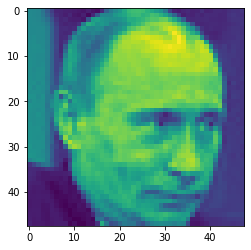

In [ ]:
plt.imshow(img)

In [ ]:
img_vec, img_hog = feature.hog(img,orientations=9,pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2),block_norm='L2', visualize=True )


# image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm='L2-Hys', visualize=False, transform_sqrt=False, feature_vector=True, multichannel=None) -> (tuple[ndarray, ndarray | None] | ndarray)

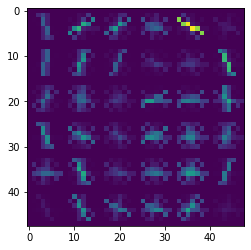

In [ ]:
plt.imshow(img_hog)

In [ ]:
img

array([[0.45882353, 0.45490196, 0.44705882, ..., 0.17647059, 0.17254902,
        0.18431373],
       [0.4627451 , 0.45490196, 0.44705882, ..., 0.18823529, 0.17647059,
        0.17254902],
       [0.46666667, 0.45882353, 0.45098039, ..., 0.18039216, 0.18039216,
        0.18039216],
       ...,
       [0.11764706, 0.11372549, 0.11764706, ..., 0.22745098, 0.22352941,
        0.22352941],
       [0.12156863, 0.10980392, 0.11372549, ..., 0.19607843, 0.2       ,
        0.20392157],
       [0.12941176, 0.10588235, 0.10980392, ..., 0.17647059, 0.18431373,
        0.19607843]])

In [ ]:
img_hog

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02203491, ..., 0.00308197, 0.        ,
        0.        ],
       [0.        , 0.00097859, 0.        , ..., 0.        , 0.00191479,
        0.        ],
       ...,
       [0.        , 0.00060659, 0.        , ..., 0.        , 0.00426227,
        0.        ],
       [0.        , 0.        , 0.00076898, ..., 0.00121085, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
img_vec.shape

(900,)

In [ ]:
df_train['hog_vector'] = df_train.image.apply(lambda x:feature.hog(x, orientations=9, pixels_per_cell=(8, 8),
                                                                   cells_per_block=(2, 2),block_norm='L2', visualize=True))

In [ ]:
df_train.hog_vector[0][0].shape, df_train.hog_vector[0][1].shape

((900,), (48, 48))

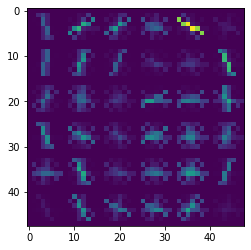

In [ ]:
plt.imshow(df_train.hog_vector[0][1])

In [ ]:
df_train['hog_vect'] = df_train.hog_vector.apply(lambda x: x[0])
df_train['hog_img'] = df_train.hog_vector.apply(lambda x: x[1])

In [ ]:
df_train.head()

,label,image,hog_vector,hog_vect,hog_img
0,angry,"[[0.4588235294117647, 0.45490196078431366, 0.4...","([0.1325764576815947, 0.0, 0.0, 0.0, 0.0035340...","[0.1325764576815947, 0.0, 0.0, 0.0, 0.00353407...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,angry,"[[0.7921568627450966, 0.6941176470588228, 0.69...","([0.17456213316691796, 0.24152990153107678, 0....","[0.17456213316691796, 0.24152990153107678, 0.1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,angry,"[[0.44705882352941195, 0.4823529411764707, 0.5...","([0.0419715450029394, 0.04150716882215625, 0.1...","[0.0419715450029394, 0.04150716882215625, 0.13...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,angry,"[[0.07843137254901945, 0.06274509803921584, 0....","([0.12389765451368857, 0.3008676586094732, 0.2...","[0.12389765451368857, 0.3008676586094732, 0.28...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,angry,"[[8.359326303059913e-17, 0.011764705882352738,...","([0.07926251868880504, 0.05508558268279427, 0....","[0.07926251868880504, 0.05508558268279427, 0.0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


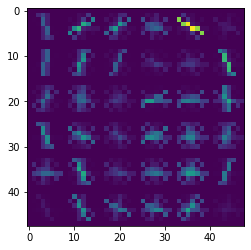

In [ ]:
plt.imshow(df_train.hog_img[0])

In [ ]:
type(df_train.hog_vect[0])

numpy.ndarray

In [ ]:
df_train.label = df_train.label.apply(lambda x:emotions[x])
df_train.label.value_counts()

3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: label, dtype: int64

In [ ]:
X_train = np.vstack(np.array(df_train.hog_vect))
y_train = np.array(df_train.label)
print(X_train.shape, y_train.shape)

(28709, 900) (28709,)


In [ ]:
#transform training data 
df_test['hog_vector'] = df_test.image.apply(lambda x:feature.hog(x, orientations=9, pixels_per_cell=(8, 8),
                                                                   cells_per_block=(2, 2),block_norm='L2', visualize=False))
print(df_test.shape)
df_test.head(2)

(7178, 3)


,label,image,hog_vector
0,angry,"[[0.2666666666666672, 0.294117647058825, 0.435...","[0.37649567509466225, 0.09541183875630241, 0.0..."
1,angry,"[[0.5568627450980366, 0.3843137254901948, 0.31...","[0.19525139086972118, 0.0858104238553717, 0.17..."


In [ ]:
#transform training data 
X_test = np.vstack(np.array(df_test.hog_vector))
y_test = np.array(df_test.label)
print(X_test.shape, y_test.shape)

(7178, 900) (7178,)


In [ ]:
#running basic SVC
svm = SVC(C=5, random_state=1, kernel='rbf', gamma=0.01)
svm.fit(X_train, y_train)
y_pred2 = svm.predict(X_test)
print('Test Accuracy: %.3f' % svm.score(X_test, y_test))
y_test2 = y_test

Test Accuracy: 0.000


In [ ]:
# split the dataframe in to train, test and validation data frames
X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)

In [ ]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [ ]:
y_pred = sgd_clf.predict(X_Test)
accuracy_score(y_Test, y_pred)

In [ ]:
accuracy_score(y_Test, y_pred)

0.13897537503538068

### SIFT SDG

In [ ]:
#Basic SGDClassifier
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.0

In [ ]:
#Converting data to numpy array and reshaping it
train_image_usample = X_train
train_label_usample = y_train
test_image_usample = X_test
test_label_usample = y_test

0.2005661712668082


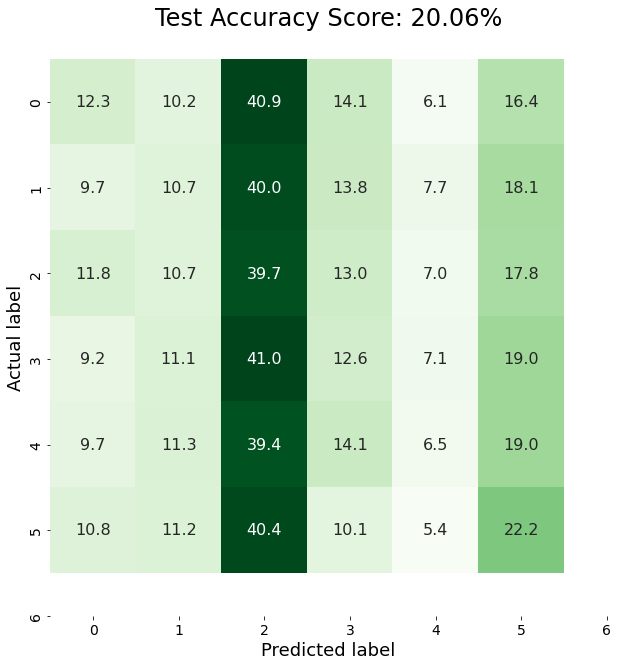

In [ ]:
# Use 28 random trees
rf_org_balanced_oversample = RandomForestClassifier(n_estimators=50,max_features='auto',random_state=101, n_jobs=-1)
rf_org_balanced_oversample.fit(train_image_usample,train_label_usample)
#Saving the model in google drive 
filename = 'rf_org_balanced_oversample.sav'
pickle.dump(rf_org_balanced_oversample, open(filename, 'wb'))

#Load the model and test for accuracy 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test_image_usample, test_label_usample)
print(result)
plot_cm(confusion_matrix(test_label_usample, loaded_model.predict(test_image_usample)),result)

## RandomForest

### Orginal Data

In [ ]:
#Navigating to RF Directory in Google Drive /content/drive/MyDrive/Colab Notebooks
%cd /content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/RF

/content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/RF


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

rf_org = RandomForestClassifier(n_estimators=50,max_features='auto',random_state=101, n_jobs=-1)
rf_org.fit(X_train_org_array,y_train_org_array)
#Load the model and test for accuracy 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_org_array, y_test_org_array)
print(result)

In [ ]:
# Use 28 random trees
rf_org = RandomForestClassifier(n_estimators=50,max_features='auto',random_state=101, n_jobs=-1)
rf_org.fit(X_train_org_array,y_train_org_array)
#Saving the model in google drive 
filename = 'rf_org.sav'
pickle.dump(rf_org, open(filename, 'wb'))

In [ ]:
#Load the model and test for accuracy 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_org_array, y_test_org_array)
print(result)

0.44859292281972696


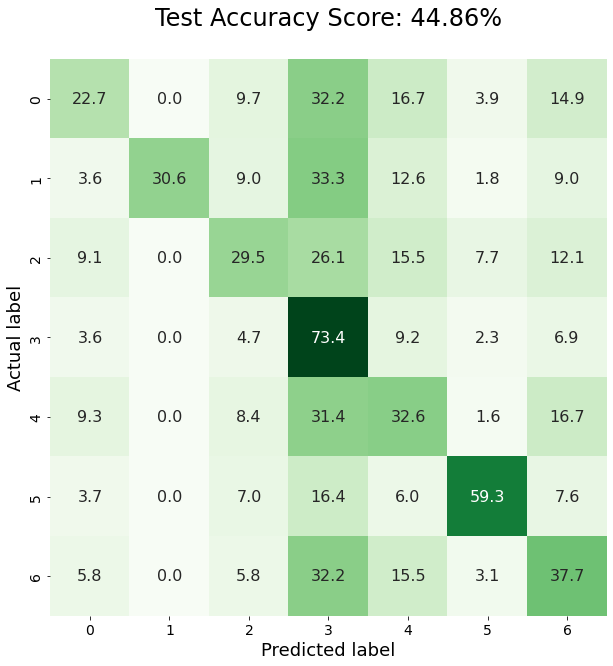

In [ ]:
plot_cm(confusion_matrix(y_test_org_array, loaded_model.predict(X_test_org_array)),result)

### HoG

In [ ]:
# Use 28 random trees
rf_org_hog = RandomForestClassifier(n_estimators=50,max_features='auto',random_state=101, n_jobs=-1)
rf_org_hog.fit(X_train_hog,y_train_org_array)
#Saving the model in google drive 
filename = 'rf_org_hog.sav'
pickle.dump(rf_org_hog, open(filename, 'wb'))

0.4513792142658122


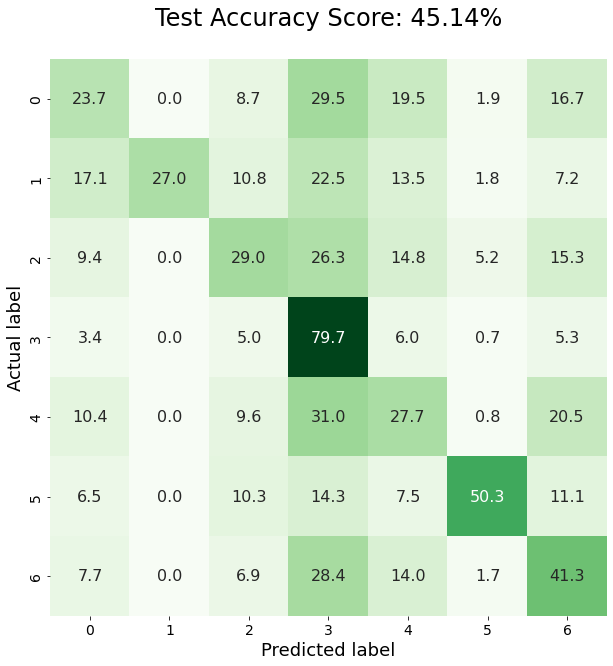

In [ ]:
#Load the model and test for accuracy 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_Test_hog, y_test_org_array)
print(result)
plot_cm(confusion_matrix(y_test_org_array, loaded_model.predict(X_Test_hog)),result)

In [ ]:
y_test_org_array

array([0, 0, 0, ..., 5, 5, 5])

In [ ]:
emotions=emotions_labelss

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_Test_hog, y_test_org_array)
print(result)
plot_cm(confusion_matrix(y_test_org_array, loaded_model.predict(X_Test_hog)),result)


ValueError: ignored

### Under Sample Data / Balanced Data

In [ ]:
#Converting data to numpy array and reshaping it
train_image_usample = np.array(train_image_usample).reshape(3052,48*48 )
train_label_usample = np.array(train_label_usample)
test_image_usample = np.array(test_image_usample).reshape(12012,48*48 )
test_label_usample = np.array(test_label_usample)

0.34065934065934067


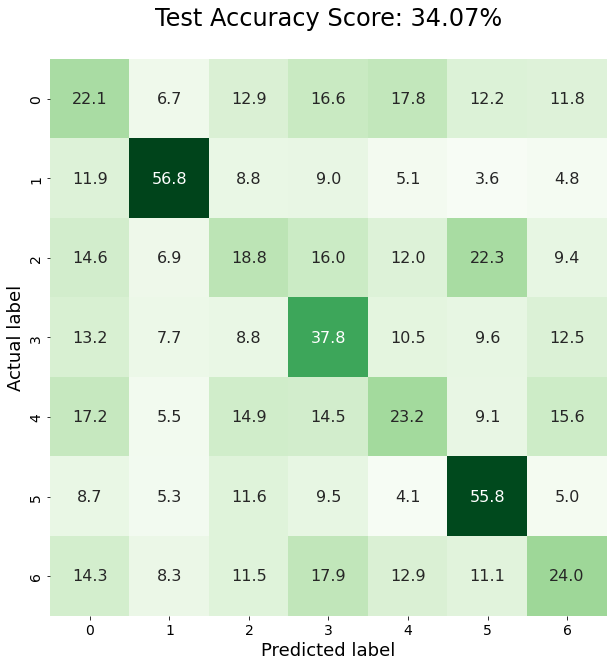

In [ ]:
# Use 28 random trees
rf_org_balanced_usersample = RandomForestClassifier(n_estimators=50,max_features='auto',random_state=101, n_jobs=-1)
rf_org_balanced_usersample.fit(train_image_usample,train_label_usample)
#Saving the model in google drive 
filename = 'rf_org_balanced_usersample.sav'
pickle.dump(rf_org_balanced_usersample, open(filename, 'wb'))

#Load the model and test for accuracy 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test_image_usample, test_label_usample)
print(result)
plot_cm(confusion_matrix(test_label_usample, loaded_model.predict(test_image_usample)),result)

### OverSample

In [ ]:
#Converting data to numpy array and reshaping it
train_image_usample = np.array(train_image_array).reshape(49175,48*48 )
train_label_usample = np.array(train_image_label)
test_image_usample = np.array(test_image_array).reshape(12012,48*48 )
test_label_usample = np.array(test_image_label)

0.41150516150516153


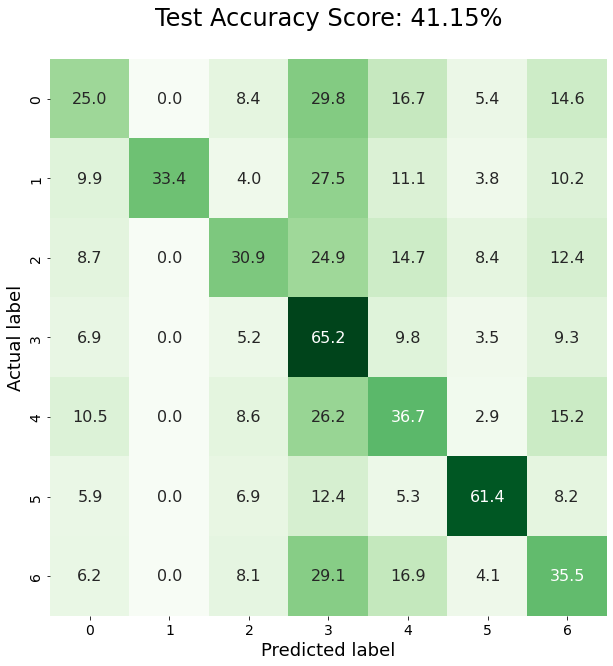

In [ ]:
# Use 28 random trees
rf_org_balanced_oversample = RandomForestClassifier(n_estimators=50,max_features='auto',random_state=101, n_jobs=-1)
rf_org_balanced_oversample.fit(train_image_usample,train_label_usample)
#Saving the model in google drive 
filename = 'rf_org_balanced_oversample.sav'
pickle.dump(rf_org_balanced_oversample, open(filename, 'wb'))

#Load the model and test for accuracy 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test_image_usample, test_label_usample)
print(result)
plot_cm(confusion_matrix(test_label_usample, loaded_model.predict(test_image_usample)),result)

In [ ]:
print(classification_report(model_pred,y_Test))

              precision    recall  f1-score   support

           0       0.07      1.00      0.13        40
           1       0.17      1.00      0.29        11
           2       0.10      0.90      0.19        71
           3       0.18      0.87      0.30       230
           4       0.03      0.76      0.07        33
           5       0.32      0.93      0.48       162
           6       0.05      0.93      0.10        43

   micro avg       0.12      0.90      0.22       590
   macro avg       0.13      0.91      0.22       590
weighted avg       0.19      0.90      0.30       590
 samples avg       0.12      0.12      0.12       590



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# split the dataframe in to train, test and validation data frames

from sklearn.model_selection import train_test_split
X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.5, shuffle = True)


In [ ]:
print('validation data shape: ',X_val.shape, y_val.shape)
print('Testing data shape: ',X_Test.shape, y_Test.shape)
print('Training data shape: ',X_train.shape, y_train.shape)

validation data shape:  (4306, 2304) (4306, 7)
Testing data shape:  (4307, 2304) (4307, 7)
Training data shape:  (77514, 2304) (77514, 7)


## DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/DT

/content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/DT


In [ ]:
dt = DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy',
                       max_depth=5, max_features='auto',min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,random_state=1024, splitter='best')

In [ ]:
dt.fit(X_train_org_array,y_train_org_array)
#Saving the model in google drive 
filename = 'dt_org.sav'
pickle.dump(dt, open(filename, 'wb'))

In [ ]:
#Load the model and test for accuracy 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_org_array, y_test_org_array)
print(result)

0.24714405126776262


In [ ]:
result

0.24714405126776262

# Function

In [112]:
def plot_cm(cm,testscore):
  '''provide cm item and test score'''
  cm_labels_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  cm_labels_norm = cm_labels_norm * 100.00

  plt.figure(figsize=(9,9))
  sns.heatmap(cm_labels_norm,
              annot=True, 
              annot_kws={'size':16},
              fmt=".1f",
            cmap='Greens',
            xticklabels=[i for i in emotions.values()],
            yticklabels=[i for i in emotions.values()],
            square=True,
            cbar=False)
  plt.title('Test Accuracy Score: {0}%\n'.format("%.2f" % (testscore*100.0)), size=24)
  plt.tight_layout()
  plt.xticks(size=14)
  plt.yticks(size=14)
  plt.ylabel('Actual label', size=18)
  plt.xlabel('Predicted label', size=18)
  plt.show()

In [26]:
def rf_model(X_train,y_train, filename):
  #bestFit
  print('RandomForestClassifier')
  rf = RandomForestClassifier(n_estimators=2000,max_features='sqrt',
                              random_state=101, n_jobs=-1,max_depth=60, min_samples_leaf=1, min_samples_split=2)
  rf.fit(X_train,y_train)
  #Saving the model in google drive 
  filename = 'FinalModel/rf_'+filename
  pickle.dump(rf, open(filename, 'wb'))

def sdg_model(X_train,y_train, filename):
  print(SGDClassifier)
  #Best Params: SDG {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l1'}
  sdg = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3,
                          alpha= 0.0001, learning_rate= 'optimal', 
                          loss='hinge', penalty= 'l1')
  sdg.fit(X_train, y_train)
  #Saving the model in google drive 
  filename='FinalModel/sdg_'+filename
  pickle.dump(sdg, open(filename, 'wb'))

In [27]:
def one_plot_cm(cm,testscore,model_name):
  data='HoG'
  '''provide cm item and test score'''
  emotion_labels_cm = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
  cm_labels_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  cm_labels_norm = cm_labels_norm * 100.00

  plt.figure(figsize=(9,9))
  sns.heatmap(cm_labels_norm,
              annot=True, 
              annot_kws={'size':16},
              fmt=".1f",
            cmap='Greens', #Spectral 'binary'
            xticklabels=[i for i in emotion_labels_cm.values()],
            yticklabels=[i for i in emotion_labels_cm.values()],
            square=True,
            cbar=False)
  plt.title('{} Test Accuracy Score: {}% with {}\n'.format(model_name, "%.2f" % (testscore*100.0), data), size=20)
  plt.xticks(size=14)
  plt.yticks(size=14)
  plt.ylabel('Actual label', size=18)
  plt.xlabel('Predicted label', size=18)
  plt.tight_layout()
  plt.show()

In [28]:
def import_data_return2set(dir, labels_dic):
  '''this funciton will be used to extract image data into 2 list,
  1st list labels will contain labels information and 
  2nd list images will contain flaten pixels of each image.
  - image data is already reshed into 48,48 numpy array'''
  
  data=[]
  labels= []
  labels_code = []
  for directory in sorted(glob(dir+'/*')):
    image_files = glob(directory + '/*.jpg')
    label = directory.split('/')[-1]
    for image_file in image_files:
     # image = resize(imread(image_file), (48,48))
      data.append(resize(imread(image_file), (48,48)))
      labels.append(labels_dic[label])
      labels_code.append(label)

  return data, labels,labels_code

In [29]:
def import_data(dir):
  '''this funciton will be used to extract image data into 2 list,
  1st list labels will contain labels information and 
  2nd list images will contain flaten pixels of each image.
  - image data is already reshed into 48,48 numpy array'''

  data=[]
  for directory in sorted(glob(dir+'/*')):
    image_files = glob(directory + '/*.jpg')
    label = directory.split('/')[-1]
    for image_file in image_files:
      image = resize(imread(image_file), (48,48))
      data.append(( label, image))
  return data

In [30]:
def load_data(df, data_type):
    """Load data from DataFrame and return data to list 
    """
    image_data = []
    image_scaled = []
    
    for index, row in df.iterrows():
        if data_type == 1:
            field = row.pca
        elif data_type == 2:
            field = row.histogram
        elif data_type == 3:
            field = row.hog
        elif data_type == 4:
            field = row.lda
        else:
            field = row.pixels
        image = np.fromstring(field, sep=' ')
        image_data.append(image)
        if data_type == 0:
            scale = image / 255.0
            image_scaled.append(scale)
        
    return image_data, image_scaled

In [31]:
def custom_train_test_split(csv, data_type):
    """process the data output will be 
    X_train, X_test, y_train, y_test
    """
    print(csv)
    df = pd.read_csv(csv)
    # shuffle the DataFrame rows
    df = df.sample(frac = 1)
    df_train = df[df['usage']=='train']
    df_test = df[df['usage']=='test']
    #we are taking a subset of our Data frame with only training data 
    train_data, _ = load_data(df_train, data_type)
    #we are taking a subset of our data frame with only testing data 
    test_data, _ = load_data(df_test, data_type)

    print('Shape of data > :', '(X_train, X_test, y_train, y_test)', 
          np.array(train_data).shape, 
          np.array(test_data).shape, 
          np.array(df_train.emotion).shape, 
          np.array(df_test.emotion).shape)

    return (np.array(train_data), 
            np.array(test_data), 
            np.array(df[df['usage']=='train'].emotion), 
            np.array(df_test.emotion))

In [32]:
def processSDG(csv, data_type):
    """Process SVM for each csv data
    """
    print(csv)
    df = pd.read_csv(csv)
    df.head()
    
    df_train = df[df['usage']=='train']
    df_test = df[df['usage']=='test']
    train_data, train_scaled = load_data(df_train, data_type)
    train_target = list(df_train.emotion)
    test_data, test_scaled = load_data(df_test, data_type)
    test_target = list(df_test.emotion)
    
    X_train = np.array(train_data)
    y_train = np.array(train_target)
    X_test = np.array(test_data)
    y_test = np.array(test_target)
    
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
    
    #Orginal Data 
    model = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
    #model = SVC(C=5, random_state=1, kernel='rbf', gamma='auto', decision_function_shape='ovo')

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_score=accuracy_score(y_test, y_pred)
    #print(model.score(X_train, y_train))
    print('Train Accuracy: %.3f' % model.score(X_train, y_train))
    print('Test Accuracy: %.3f' % model.score(X_test, y_test))
    
    return y_pred, y_test

In [33]:
def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.0] = 0
    return loss


In [126]:
##borrowed the function from geeksforgeeks website
##*** note function has been modified to be used with this project
#url: https://www.geeksforgeeks.org/compute-classification-report-and-confusion-matrix-in-python/ 
#    cm=Confusion_matrix(y_test, y_pred, classes)
    #cr=performance_report(cm)
    #print("\nCR by library method=\n",
         # classification_report(y_test, y_pred))
def performance_report(cm, model, dataType):
    col = len(cm)
      
    # col=number of class
    arr = []
    for key, value in cm.items():
        arr.append(value)
  
    cr = dict()
    support_sum = 0
      
    # macro avg of support is
    # sum of support only, not the mean.
    macro = [0]*3  
      
    # weighted avg of support is
    # sum of support only, not the mean.
    weighted = [0]*3
    for i in range(col):
        vertical_sum= sum([arr[j][i] for j in range(col)])
        horizontal_sum= sum(arr[i])
        p = arr[i][i] / vertical_sum
        r = arr[i][i] / horizontal_sum
        f = (2 * p * r) / (p + r)
        s = horizontal_sum
        row=[p,r,f,s]
        support_sum+=s
        for j in range(3):
            macro[j]+=row[j]
            weighted[j]+=row[j]*s
        cr[list(cm.keys())[i]]=row
  
    # add Accuracy parameters.
    truepos=0
    total=0
    for i in range(col):
        truepos+=arr[i][i]
        total+=sum(arr[i])
  
    cr['Accuracy']=["", "", truepos/total, support_sum]
  
    # Add macro-weight and weighted_avg features.
    macro_avg=[Sum/col for Sum in macro]
    macro_avg.append(support_sum)
    cr['Macro_avg']=macro_avg
  
    weighted_avg=[Sum/support_sum for Sum in weighted]
    weighted_avg.append(support_sum)
    cr['Weighted_avg']=weighted_avg
  
    # print the classification_report
    print("       Classification Report for {} with {}".format(model, dataType))
    space,p,r,f,s="labels","Precision","Recall","F1-Score","Support"
    print("%13s %9s %9s %9s %9s\n"%(space,p,r,f,s))
    stop=0
    for key,value in cr.items():
        if stop<col:
            stop+=1
            print("%13s %9.2f %9.2f %9.2f %9d"%(key,value[0],
                                                value[1],
                                                value[2],
                                                value[3]))
        elif stop==col:
            stop+=1
            print("\n%13s %9s %9s %9.2f %9d"%(key,value[0],
                                              value[1],
                                              value[2],
                                              value[3]))
        else:
            print("%13s %9.2f %9.2f %9.2f %9d"%(key,
                                                value[0],
                                                value[1],
                                                value[2],
                                                value[3]))
    return cr
            
def Confusion_matrix(y_test, y_pred, target_names=None):
    
    # target_names is a list.
    # actual values are arranged in the rows.
    # predicted values are arranged in the columns.
    # if there are m classes, then cm is m*m matrix.
    if target_names == None:
        m = len(set(y_test))
    else:
        m = len(target_names)
    size = len(y_test)
    matrix = dict()
  
    # create matrix initialised with 0
    for class_name in range(m):
        matrix[class_name] = [0 for k in range(m)]
  
    # populating the matrix.
    for i in range(size):
        actual_class = y_test[i]
        pred_class = y_pred[i]
        matrix[actual_class][pred_class] += 1
  
    # Change the name of columns.
    if target_names == None:
        # Now, lets print the confusion matrix.
        print("Confusion Matrix of given model is :")
        if m == 3:
            print("Count=%-14d %-15s %-15s %-15s" % (size, 
                                                     '0', '1',
                                                     '2'))
            for key, value in matrix.items():
                print("Actual %-13s %-15d %-15d %-15d" %
                      (key, value[0], value[1], value[2]))
        elif m == 2:
            print("Count=%-14d %-15s %-15s" % (size, '0', '1'))
            for key, value in matrix.items():
                print("Actual %-13s %-15d %-15d" % (key, value[0], 
                                                    value[1]))
    else:
        matrix = dict(zip(target_names, list(matrix.values())))
  
        # Now, lets print the confusion matrix.
        print("Confusion Matrix of given model is :")
        print("Count=%-14d %-10s %-10s %-10s %-10s %-10s %-10s %-10s" %
              (size, target_names[0], target_names[1], target_names[2],target_names[3],target_names[4],target_names[5],target_names[6]))
        for key, value in matrix.items():
            print("Actual %-14s %-10d %-10d %-10d %-10d %-10d %-10d %-10d" %
                  (key, value[0], value[1], value[2], value[3], value[4], value[5], value[6]))
  
    return matrix
  

In [ ]:
#**